In [471]:
import pandas as pd
import seaborn as sns

In [365]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [366]:
# 윈도우용 한글깨짐 방지
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [367]:
aa = pd.read_csv("./totalData3.csv",encoding="CP949")

In [368]:
aa.head()

자치구  14'발생    14'검거율  15'발생    15'검거율  16'발생    16'검거율  17'발생    17'검거율  \
0  종로구   5021  0.918144   4705  0.941552   4459  0.963893   4057  1.093665   
1   중구   5231  0.609444   4954  0.593864   4584  0.669284   4184  0.681405   
2  용산구   3799  0.615952   3820  0.650000   4137  0.685279   4060  0.723153   
3  성동구   3582  0.571748   3358  0.632222   3026  0.790482   2767  0.734008   
4  광진구   6268  0.563338   5909  0.627348   5322  0.622322   4646  0.707921   

   18'발생  ...  22'외국인 인구수  14'평균연령  15'평균연령  16'평균연령  17'평균연령  18'평균연령  \
0   3690  ...        9106     42.5     42.9     43.4     43.7     44.2   
1   4030  ...        9288     42.9     43.4     43.8     44.1     44.5   
2   3411  ...       14332     41.8     42.3     42.7     43.2     43.6   
3   2457  ...        6682     40.5     40.9     41.3     41.6     42.0   
4   3915  ...       12631     39.5     40.0     40.5     40.9     41.4   

   19'평균연령  20'평균연령  21'평균연령  22'평균연령  
0     44.7     45.2     45.4     45.6  
1     45.0     45.6     45.8     46.1  
2     43.9     44.3     44.3     44.4  
3     42.4     43.0     43.4     43.8  
4     41.9     42.4     42.9     43.3  

[5 rows x 199 columns]

In [369]:
aa.shape

(25, 199)

In [370]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 199 entries, 자치구 to 22'평균연령
dtypes: float64(126), int64(72), object(1)
memory usage: 39.0+ KB


In [371]:
aa.index
df = pd.DataFrame(zip(aa["자치구"]))
df.rename(columns={0:"자치구"},inplace =True)

# 이 바로 밑에거는 전체를 실행하는거라 본인이 맡은 부분만 data_list에 넣어주시면 이거는 따로 실행할 필요 없어요

In [372]:
data = []
aa.columns
for i in aa.columns[1:]:
    data.append(i[3:])
# data
data_set = set(data)
data_set
data_list = list(data_set)
print(data_list)
print(len(data_list)) # data_list 14~22년도를 한 번에 묶은 리스트 


['검거율', '행복지수', '파출소현황', '발생', '외국인 인구수', '유흥주점', '월간 음주율', '최저기온', '평균기온', '평균최고기온', '최대 순간 풍속', '경찰관', '지가변동평균', '최고기온', '인구밀도', 'cctv', '우울감 경험률', '평균최저기온', '강수량합', '인구', '평균연령', '평균 풍속']
22


# 맡은 부분 나눠서 데이터 분석

In [373]:
data_list = ['최저기온', '평균최저기온', '최고기온' ,  '평균기온', '평균최고기온','평균 풍속','최대 순간 풍속' ,'강수량합','지가변동평균' ]

In [374]:
df_list = [] 
df = pd.DataFrame(zip(aa["자치구"]))
df.rename(columns={0:"자치구"},inplace =True) 
for i in data_list:    
    for j in range(14,23):
        df = pd.concat([df,aa.loc[:,f"{j}'{i}"].to_frame()],axis=1)
    
df.set_index("자치구",inplace = True)
df.head()

14'최저기온  15'최저기온  16'최저기온  17'최저기온  18'최저기온  19'최저기온  20'최저기온  21'최저기온  \
자치구                                                                           
종로구    -13.2    -13.0    -18.0    -12.6    -17.8    -10.9    -12.9    -18.6   
중구     -13.8    -13.5    -18.9    -13.9    -19.6    -12.7    -14.7    -20.1   
용산구    -11.7    -11.1    -16.7    -11.4    -17.2    -10.4    -12.5    -18.0   
성동구    -10.5    -10.2    -15.7    -10.2    -16.2     -9.0    -11.0    -16.0   
광진구    -11.2    -10.4    -21.7    -10.8    -16.7     -9.5    -11.9    -17.1   

     22'최저기온  14'평균최저기온  ...  22'강수량합  14'지가변동평균  15'지가변동평균  16'지가변동평균  \
자치구                      ...                                             
종로구    -13.7        9.3  ...   1775.3      2.410      1.903      2.199   
중구     -15.8        8.5  ...   1452.5      2.563      1.806      2.227   
용산구    -12.4       10.1  ...   1699.0      1.491      1.501      3.133   
성동구    -12.9       10.5  ...   1727.5      1.848      2.218      2.916   
광진구    -12.9       10.2  ...   1918.0      1.822      2.551      3.182   

     17'지가변동평균  18'지가변동평균  19'지가변동평균  20'지가변동평균  21'지가변동평균  22'지가변동평균  
자치구                                                                    
종로구      3.284      5.811      4.457      4.316      5.006      3.045  
중구       3.244      5.327      4.763      4.551      4.882      2.366  
용산구      5.225      8.598      5.860      4.854      5.507      3.255  
성동구      5.221      7.377      5.882      5.129      6.173      4.528  
광진구      4.343      5.679      5.324      4.398      5.037      2.581  

[5 rows x 81 columns]

# 결측치 확인

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 81 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   14'최저기온      25 non-null     float64
 1   15'최저기온      25 non-null     float64
 2   16'최저기온      25 non-null     float64
 3   17'최저기온      25 non-null     float64
 4   18'최저기온      25 non-null     float64
 5   19'최저기온      25 non-null     float64
 6   20'최저기온      25 non-null     float64
 7   21'최저기온      25 non-null     float64
 8   22'최저기온      25 non-null     float64
 9   14'평균최저기온    25 non-null     float64
 10  15'평균최저기온    25 non-null     float64
 11  16'평균최저기온    25 non-null     float64
 12  17'평균최저기온    23 non-null     float64
 13  18'평균최저기온    25 non-null     float64
 14  19'평균최저기온    24 non-null     float64
 15  20'평균최저기온    25 non-null     float64
 16  21'평균최저기온    22 non-null     float64
 17  22'평균최저기온    24 non-null     float64
 18  14'최고기온      25 non-null     float64
 19  15'최고기온     

In [376]:
df.isna().sum().loc[df.isna().sum() >= 1]

17'평균최저기온      2
19'평균최저기온      1
21'평균최저기온      3
22'평균최저기온      1
17'평균기온        2
19'평균기온        1
21'평균기온        3
22'평균기온        1
17'평균최고기온      2
19'평균최고기온      1
21'평균최고기온      3
22'평균최고기온      1
17'평균 풍속       1
19'평균 풍속       1
20'평균 풍속       1
21'평균 풍속       3
22'평균 풍속       1
18'최대 순간 풍속    1
19'최대 순간 풍속    1
20'최대 순간 풍속    1
21'최대 순간 풍속    1
22'최대 순간 풍속    1
dtype: int64

## 날씨 데이터의 결측치가 있는 부분은 전후년도 값 평균으로 대체하겠음
- 도봉구 같은 경우는 22년에 결측치가 있어 주변구들의 22년 측정값과 도봉구 전년도 평균값으로 대체하겠음
- 평균 풍속도 마찬가지로 실행
- 순간 최대 풍속은 주변구들의 평균으로 설정

In [377]:
df[["17'평균최저기온","19'평균최저기온","21'평균최저기온","22'평균최저기온"]]

17'평균최저기온  19'평균최저기온  21'평균최저기온  22'평균최저기온
자치구                                             
종로구         8.8       9.30       9.60        9.2
중구          8.2       8.50       8.60        8.2
용산구         9.7      10.30      10.20        9.8
성동구        10.4      10.90        NaN       11.0
광진구         9.2       9.50       9.80        9.3
동대문구        9.6      10.20      10.10        9.7
중랑구         9.6      10.20      10.40        9.9
성북구         8.6       9.00       8.60        8.6
강북구         9.3       9.70       9.80        9.0
도봉구         7.5       7.70       8.40        NaN
노원구         5.4       5.90       6.50        5.8
은평구         NaN       6.00       6.40        5.7
서대문구        8.2       8.80       8.70        8.2
마포구         9.3       9.90        NaN        9.5
양천구         9.9      10.50      10.70       10.2
강서구         NaN       9.00       9.10        8.5
구로구         8.5       9.10       9.60        9.1
금천구         9.5      10.70      10.60       10.1
영등포구       10.3      10.85      10.85       10.4
동작구         8.5       8.65       9.15        8.3
관악구         7.5       7.90       8.00        7.2
서초구         8.8       9.20       9.30        8.9
강남구        10.0        NaN       9.70        9.2
송파구        10.0      10.60      10.50       10.1
강동구         8.5       9.10        NaN        8.9

In [378]:
df[["17'평균기온","19'평균기온","21'평균기온","22'평균기온"]]

17'평균기온  19'평균기온  21'평균기온  22'평균기온
자치구                                     
종로구     13.00    13.50     13.7    13.20
중구      12.10    12.50     12.6    11.80
용산구     13.70    14.30     14.2    13.80
성동구     14.00    14.50      NaN    14.50
광진구     13.30    13.90     14.0    13.40
동대문구    13.50    14.20     14.2    13.70
중랑구     13.60    14.20     14.4    13.80
성북구     12.70    13.30     12.6    12.60
강북구     13.30    14.00     14.1    13.20
도봉구     12.30    12.90     13.1      NaN
노원구     11.70    12.30     12.3    11.80
은평구       NaN    11.70     12.0    11.30
서대문구    12.60    13.20     13.0    12.40
마포구     13.20    13.90      NaN    13.40
양천구     13.70    14.40     14.7    14.00
강서구       NaN    13.50     13.7    13.10
구로구     12.80    13.60     14.0    13.40
금천구     13.30    14.30     14.4    13.70
영등포구    13.85    14.45     14.5    13.90
동작구     13.20    13.40     13.8    12.85
관악구     12.05    12.50     12.6    11.60
서초구     13.50    13.90     14.0    13.40
강남구     13.70      NaN     14.2    13.70
송파구     13.90    14.50     14.6    14.00
강동구     12.90    13.60      NaN    13.30

In [379]:
df[["17'평균최고기온","19'평균최고기온","21'평균최고기온","22'평균최고기온"]]

17'평균최고기온  19'평균최고기온  21'평균최고기온  22'평균최고기온
자치구                                             
종로구       18.10      18.50      18.50      18.00
중구        17.40      17.90      17.70      16.90
용산구       18.20      18.90      19.00      18.40
성동구       18.10      18.60        NaN      18.80
광진구       18.00      18.70      19.00      18.40
동대문구      18.10      18.90      19.00      18.50
중랑구       18.10      18.80      18.90      18.30
성북구       17.30      18.10      17.00      16.90
강북구       18.00      18.90      19.00      18.10
도봉구       17.60      18.60      18.90        NaN
노원구       17.80      18.60      18.60      18.10
은평구         NaN      18.10      18.30      17.50
서대문구      18.00      18.90      18.30      17.70
마포구       18.20      19.00        NaN      18.60
양천구       18.30      19.10      19.40      18.60
강서구         NaN      18.50      19.00      18.60
구로구       17.90      18.70      18.90      18.30
금천구       17.70      18.70      18.90      18.30
영등포구      18.20      18.80      18.95      18.25
동작구       18.35      18.85      19.25      18.25
관악구       17.20      17.80      18.10      17.10
서초구       18.50      19.00      19.10      18.50
강남구       18.00        NaN      19.50      18.80
송파구       18.50      19.10      19.20      18.50
강동구       18.00      18.60        NaN      18.40

In [380]:
def mean_jachigu(column):
    df.loc["은평구",f"17'{column}"] = df.loc["은평구",[f"16'{column}",f"18'{column}"]].mean()
    df.loc["도봉구",f"22'{column}"] = (df.loc[["노원구","강북구"],f"22'{column}"].sum() + df.loc["도봉구",f"21'{column}"]) / 3
    df.loc["성동구",f"21'{column}"] = df.loc["성동구",[f"20'{column}",f"22'{column}"]].mean()
    df.loc["마포구",f"21'{column}"] = df.loc["마포구",[f"20'{column}",f"22'{column}"]].mean()
    df.loc["강서구",f"17'{column}"] = df.loc["강서구",[f"16'{column}",f"18'{column}"]].mean()
    df.loc["강남구",f"19'{column}"] = df.loc["강남구",[f"18'{column}",f"20'{column}"]].mean()
    df.loc["강동구",f"21'{column}"] = df.loc["강동구",[f"20'{column}",f"22'{column}"]].mean()

In [381]:
mean_jachigu("평균최고기온")
mean_jachigu("평균기온")
mean_jachigu("평균최저기온")

In [382]:
df[["17'평균 풍속","19'평균 풍속","20'평균 풍속","21'평균 풍속","22'평균 풍속"]]

17'평균 풍속  19'평균 풍속  20'평균 풍속  21'평균 풍속  22'평균 풍속
자치구                                                   
종로구       2.20      2.00      2.40      2.30       2.4
중구        1.90      1.90      1.90      2.30       2.5
용산구       1.70      1.70      1.90      1.90       1.9
성동구       2.10      1.90      2.00       NaN       1.9
광진구       1.60      1.50      1.50      1.50       1.5
동대문구      1.70      1.70      1.70      1.70       1.7
중랑구       2.00      1.90      2.00      1.90       1.9
성북구       1.60      1.50      1.60      1.60       1.6
강북구       1.90      1.80      1.90      1.80       1.8
도봉구       1.10      1.10      1.20      1.10       1.2
노원구       1.20      1.10      1.20      1.20       1.1
은평구       0.80      0.90       NaN      1.00       1.0
서대문구      1.30      1.30      1.30      1.40       1.3
마포구       2.60      2.40      2.60       NaN       2.6
양천구       1.30      1.30      1.40      1.20       1.4
강서구        NaN      1.60      1.70      1.50       1.5
구로구       2.00      1.90      2.10      2.00       2.1
금천구       1.80      1.70      1.70      1.80       1.9
영등포구      1.75      1.55      1.60      1.70       1.7
동작구       1.30      1.20      1.25      1.50       1.5
관악구       1.55      1.45      1.50      1.55       1.9
서초구       1.60      1.50      1.50      1.50       1.5
강남구       1.70       NaN      1.30      1.20       NaN
송파구       1.60      1.60      1.60      1.60       1.6
강동구       1.30      1.30      1.40       NaN       1.4

In [383]:
df.loc["은평구",f"20'평균 풍속"] = df.loc["은평구",[f"19'평균 풍속",f"21'평균 풍속"]].mean()
df.loc["성동구",f"21'평균 풍속"] = df.loc["성동구",[f"19'평균 풍속",f"21'평균 풍속"]].mean()
df.loc["마포구",f"21'평균 풍속"] = df.loc["마포구",[f"19'평균 풍속",f"21'평균 풍속"]].mean()
df.loc["강서구",f"17'평균 풍속"] = df.loc["강서구",[f"16'평균 풍속",f"18'평균 풍속"]].mean()
df.loc["강남구",f"19'평균 풍속"] = df.loc["강남구",[f"18'평균 풍속",f"20'평균 풍속"]].mean()
df.loc["강남구",f"22'평균 풍속"] = (df.loc[["서초구","송파구","광진구","용산구","성동구"],f"22'평균 풍속"].sum() +df.loc["강남구",f"21'평균 풍속"]) / 6 
df.loc["강동구",f"21'평균 풍속"] = df.loc["강동구",[f"19'평균 풍속",f"21'평균 풍속"]].mean()

In [384]:
df[["18'최대 순간 풍속","19'최대 순간 풍속","20'최대 순간 풍속","21'최대 순간 풍속","22'최대 순간 풍속"]]

18'최대 순간 풍속  19'최대 순간 풍속  20'최대 순간 풍속  21'최대 순간 풍속  22'최대 순간 풍속
자치구                                                                  
종로구           NaN          NaN          NaN          NaN          NaN
중구          15.10        16.10        22.80        23.30        21.60
용산구         16.90        16.10        18.10        20.70        18.40
성동구         21.60        27.90        20.60        17.90        19.90
광진구         11.90        14.00        12.00        11.90        12.40
동대문구        20.80        24.20        19.70        25.60        20.30
중랑구         23.20        27.60        18.00        17.60        16.40
성북구         21.50        25.00        21.30        18.20        18.80
강북구         18.40        26.00        25.20        20.00        16.70
도봉구         13.60        16.70        15.80        45.00        16.90
노원구         15.50        19.70        13.60        17.90        13.70
은평구         13.60        13.00        15.50        12.50        13.30
서대문구        13.00        15.00        15.10        19.40        18.00
마포구         19.00        30.10        17.60        21.80        18.90
양천구         14.80        19.00        10.60        10.20        13.00
강서구         13.30        20.30        13.00        15.90        12.70
구로구         22.50        29.40        21.90        18.30        20.60
금천구         14.90        20.10        14.10        14.10        20.70
영등포구        15.00        15.85        12.65        13.00        43.95
동작구         15.85        19.65        14.95        15.25        14.65
관악구         15.55        17.75        14.40        15.75        13.35
서초구         12.30        13.30        11.90        13.10        14.70
강남구         16.10        13.30        13.40        12.90        19.10
송파구         13.80        17.70        12.10        12.80        11.50
강동구         19.10        24.50        16.90        12.70        17.50

In [385]:
for i in range(18,23):
    df.loc["종로구",f"{i}'최대 순간 풍속"] = df.loc[["중구","성북구","서대문구","은평구"],f"{i}'최대 순간 풍속"].mean()

In [386]:
print(df.isna().sum().loc[df.isna().sum() >= 1])

Series([], dtype: int64)


In [387]:
df.describe()

14'최저기온    15'최저기온    16'최저기온    17'최저기온    18'최저기온    19'최저기온  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean  -12.620000 -12.042000 -17.326000 -12.338000 -17.732000 -10.726000   
std     1.582456   1.589135   1.346687   1.878679   1.299189   1.463025   
min   -17.000000 -16.400000 -21.700000 -17.900000 -20.900000 -14.400000   
25%   -13.500000 -13.000000 -17.700000 -12.700000 -18.000000 -11.400000   
50%   -12.100000 -11.500000 -17.000000 -11.700000 -17.200000 -10.200000   
75%   -11.500000 -11.000000 -16.400000 -11.100000 -16.900000  -9.700000   
max   -10.500000 -10.200000 -15.700000 -10.200000 -16.200000  -9.000000   

         20'최저기온    21'최저기온    22'최저기온  14'평균최저기온  ...      22'강수량합  \
count  25.000000  25.000000  25.000000  25.000000  ...    25.000000   
mean  -12.816000 -18.438000 -13.784000   9.236000  ...  1777.058000   
std     1.369285   1.674955   1.303099   1.233771  ...   159.396698   
min   -16.800000 -22.600000 -17.500000   5.900000  ...  1452.500000   
25%   -13.400000 -19.200000 -14.500000   8.800000  ...  1687.000000   
50%   -12.400000 -17.900000 -13.100000   9.700000  ...  1775.300000   
75%   -11.900000 -17.250000 -12.900000  10.200000  ...  1912.500000   
max   -11.000000 -16.000000 -12.400000  10.650000  ...  2074.000000   

       14'지가변동평균  15'지가변동평균  16'지가변동평균  17'지가변동평균  18'지가변동평균  19'지가변동평균  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    2.189720   2.455000   2.783680   4.128840   5.883600   5.048960   
std     0.743767   0.494614   0.438708   0.696762   1.145607   0.583081   
min     1.361000   1.501000   2.199000   3.124000   4.387000   3.827000   
25%     1.822000   2.191000   2.411000   3.697000   5.131000   4.589000   
50%     1.867000   2.420000   2.674000   4.024000   5.694000   5.059000   
75%     2.410000   2.566000   3.127000   4.481000   6.303000   5.536000   
max     4.216000   3.804000   3.821000   5.476000   8.598000   6.052000   

       20'지가변동평균  21'지가변동평균  22'지가변동평균  
count  25.000000  25.000000  25.000000  
mean    4.512360   4.975520   2.725040  
std     0.506013   0.609523   0.728715  
min     3.258000   4.046000   1.734000  
25%     4.337000   4.664000   2.203000  
50%     4.436000   4.962000   2.643000  
75%     4.792000   5.318000   3.125000  
max     5.518000   6.173000   4.528000  

[8 rows x 81 columns]

In [388]:
df_list = []
for i in data_list:
    df_t = pd.DataFrame()
    for j in range(14,23):
        df_t = pd.concat([df_t,df.loc[:,f"{j}'{i}"].to_frame()],axis=1)
    df_list.append(df_t)

## 상대적으로 강수량을 제외한 나머지들은 표준편차가 적어서 평균쪽에 분포되는거 같음

In [389]:
for i in df_list:
    print(i.describe())

         14'최저기온    15'최저기온    16'최저기온    17'최저기온    18'최저기온    19'최저기온  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean  -12.620000 -12.042000 -17.326000 -12.338000 -17.732000 -10.726000   
std     1.582456   1.589135   1.346687   1.878679   1.299189   1.463025   
min   -17.000000 -16.400000 -21.700000 -17.900000 -20.900000 -14.400000   
25%   -13.500000 -13.000000 -17.700000 -12.700000 -18.000000 -11.400000   
50%   -12.100000 -11.500000 -17.000000 -11.700000 -17.200000 -10.200000   
75%   -11.500000 -11.000000 -16.400000 -11.100000 -16.900000  -9.700000   
max   -10.500000 -10.200000 -15.700000 -10.200000 -16.200000  -9.000000   

         20'최저기온    21'최저기온    22'최저기온  
count  25.000000  25.000000  25.000000  
mean  -12.816000 -18.438000 -13.784000  
std     1.369285   1.674955   1.303099  
min   -16.800000 -22.600000 -17.500000  
25%   -13.400000 -19.200000 -14.500000  
50%   -12.400000 -17.900000 -13.100000  
75%   -11.900000 -17.250000 -12.90000

# show_plt_part는 본인이 원하는 구들만 보고 싶으시면  data_list에 밑에 보이는 a변수처럼 추가하시고 실행하면 됩니다 
- 여기 i 바꿔주셔야 다른 그래프 그려집니다

In [390]:
def show_plt_part(data_list,i=0):
    fig = plt.figure(figsize = (15,8))
    plt.plot(df_list[i].loc[data_list].T,"D-")
    plt.legend(data_list,loc="upper right")
    plt.title("연도별 흐름")
    plt.xlabel("연도")
    plt.ylabel("수")
    plt.grid(True)
    plt.show()

# show_plt 이거는 전체구를 판단, i는 기본 0이여서 바꿔주셔야 다른 그래프 그려집니다.

In [391]:
def show_plt(i=0):
    fig = plt.figure(figsize = (15,7))
    plt.plot(df_list[i].T,"D-")
    plt.legend(df_list[i].T.columns,loc="upper right")
    plt.title("연도별 흐름")
    plt.xlabel("연도")
    plt.ylabel("수")
    plt.grid(True)
    plt.show()

# 이상치 확인하기

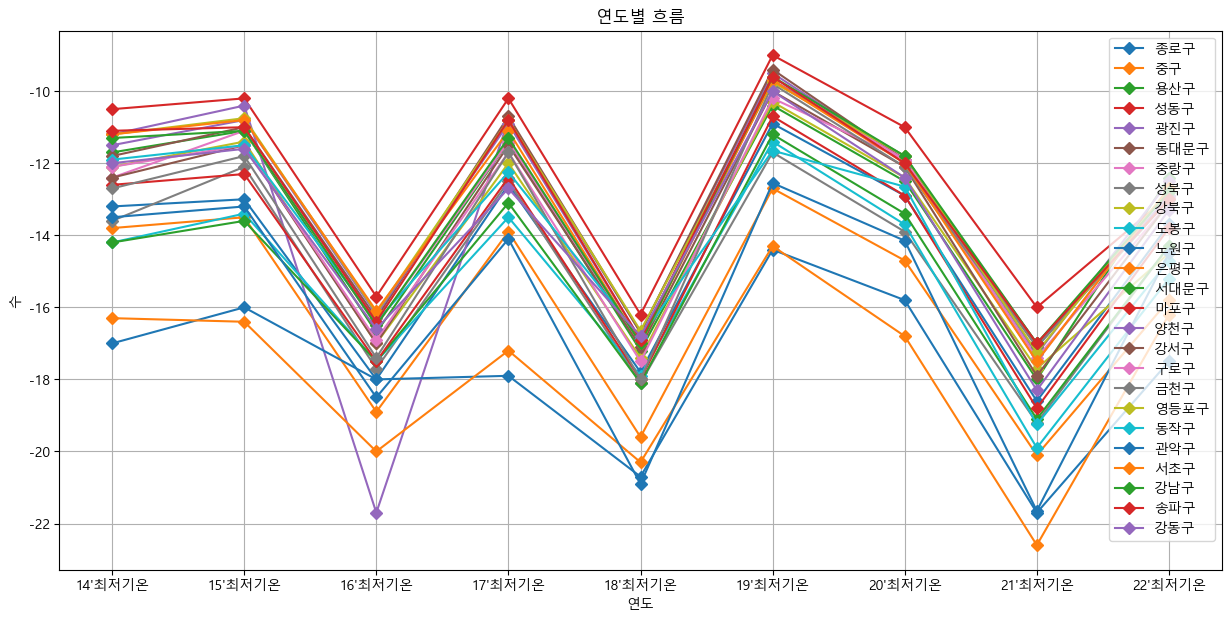

In [392]:
show_plt(0)

- 전체적인 그래프 흐름을 비슷하게 가고있는거 같음
- 16년,18년,21년 한파가 좀 심했다고하는 자료도 있지만 16년도 광진구가 다른 지역에 비해 영향을 많이 받은걸로 생각되어진다.

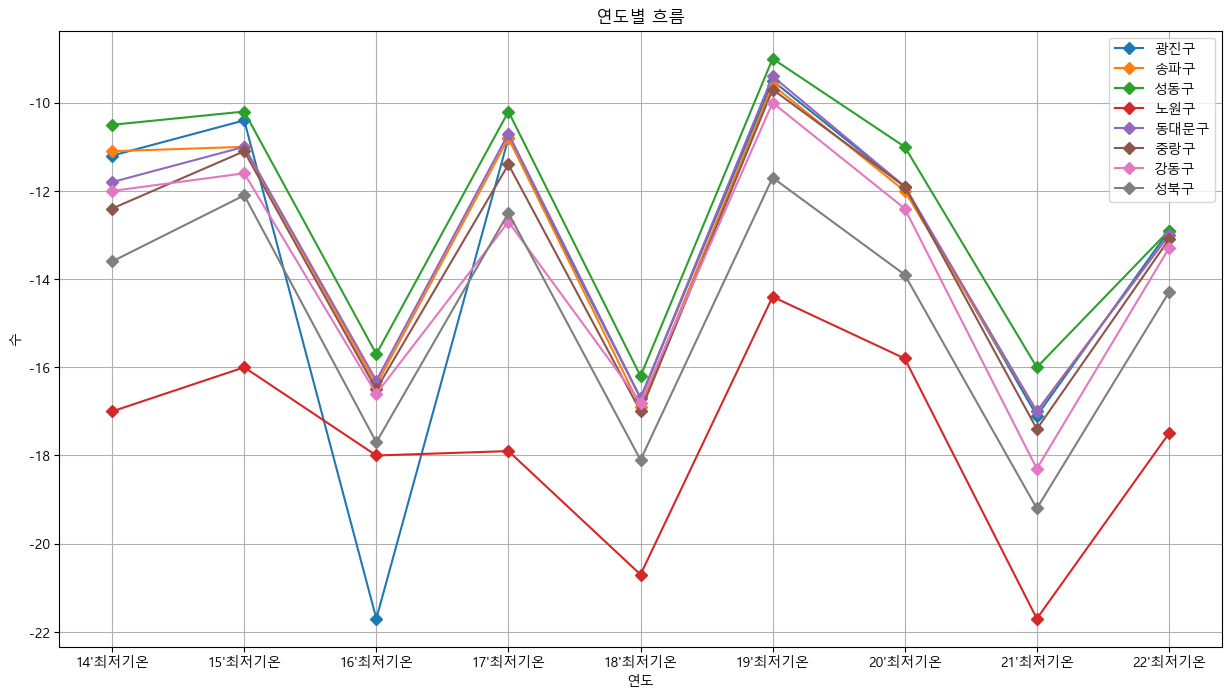

In [393]:
show_plt_part(["광진구","송파구","성동구","노원구","동대문구","중랑구","강동구","성북구"])

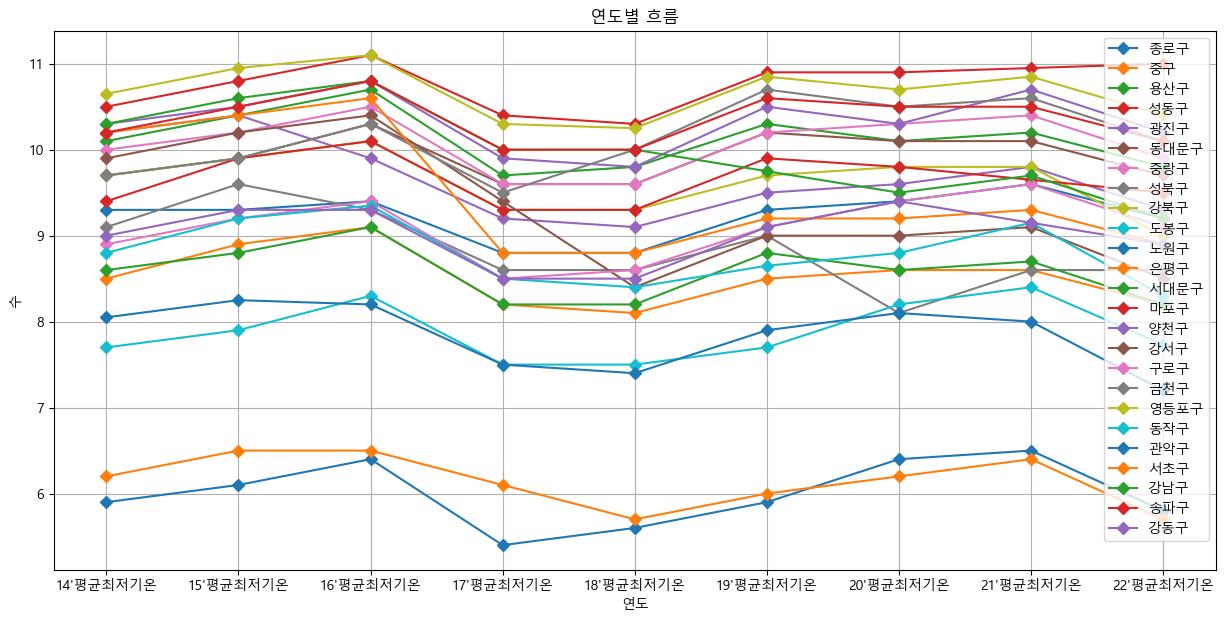

In [394]:
show_plt(1)

- 17 ~ 18년도 겨울 한파 때문에 서초구 급격하게 떨어진걸로 추측 
- 성북구 일단 체크

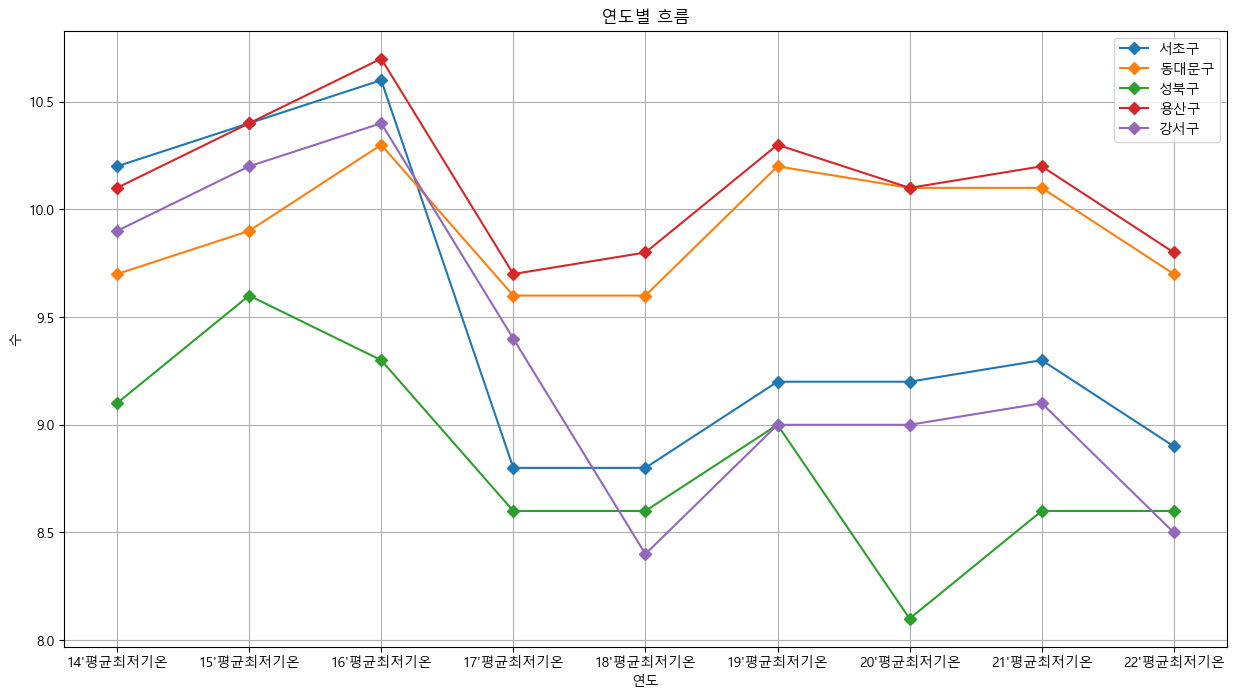

In [395]:
show_plt_part(["서초구","동대문구","성북구","용산구","강서구",],1)

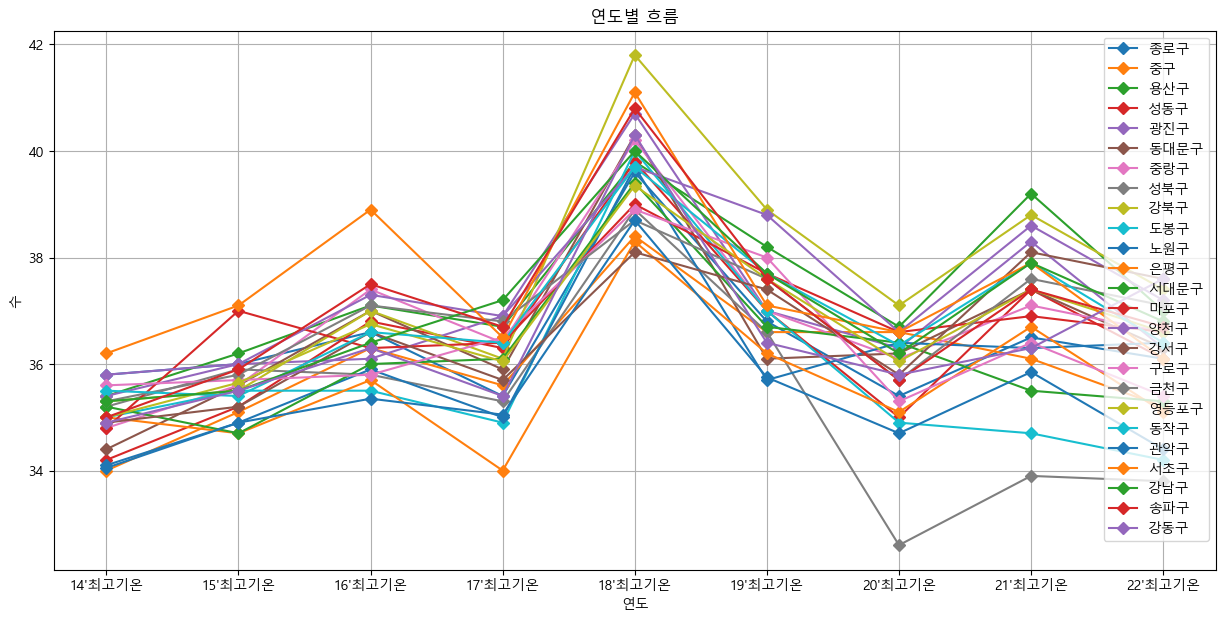

In [396]:
show_plt(2)

- 성북구 20년도 체크

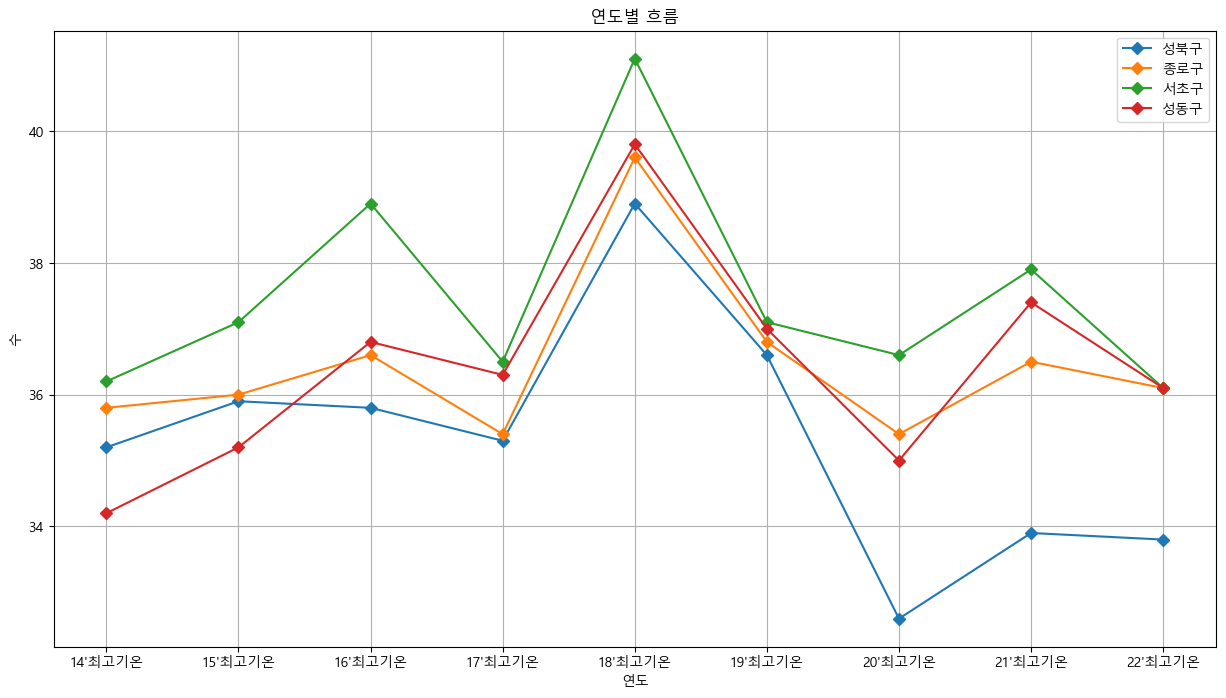

In [398]:
show_plt_part(["성북구","종로구","서초구","성동구"],2)

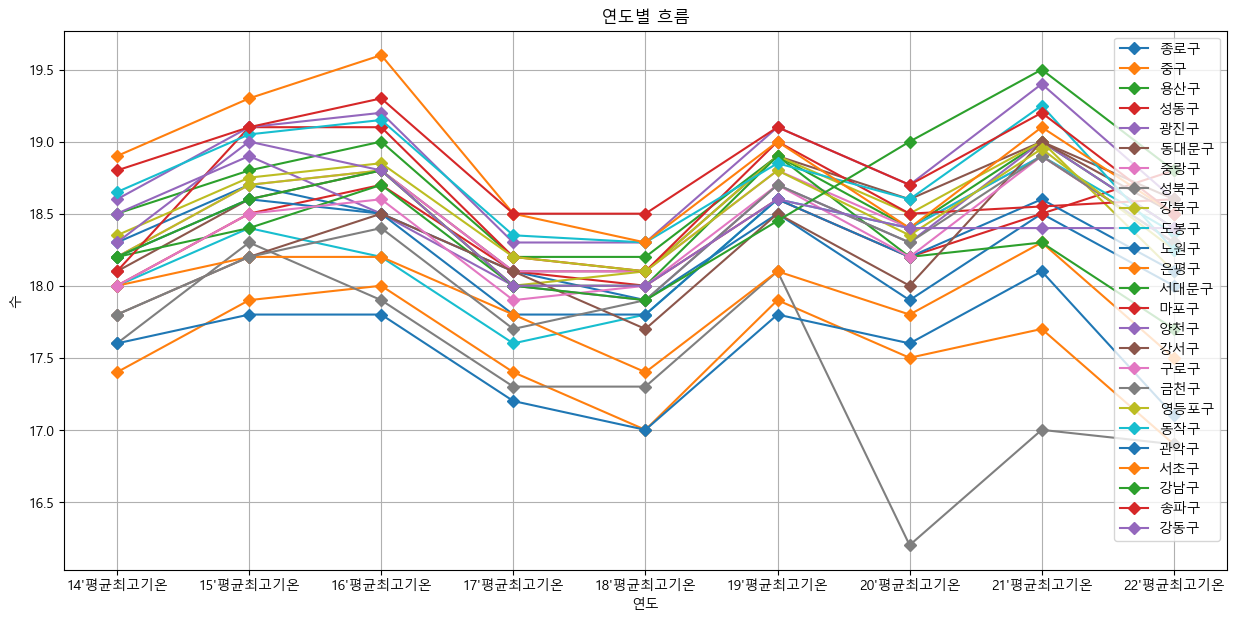

In [399]:
show_plt(4)

- 20년도 성북구 체크

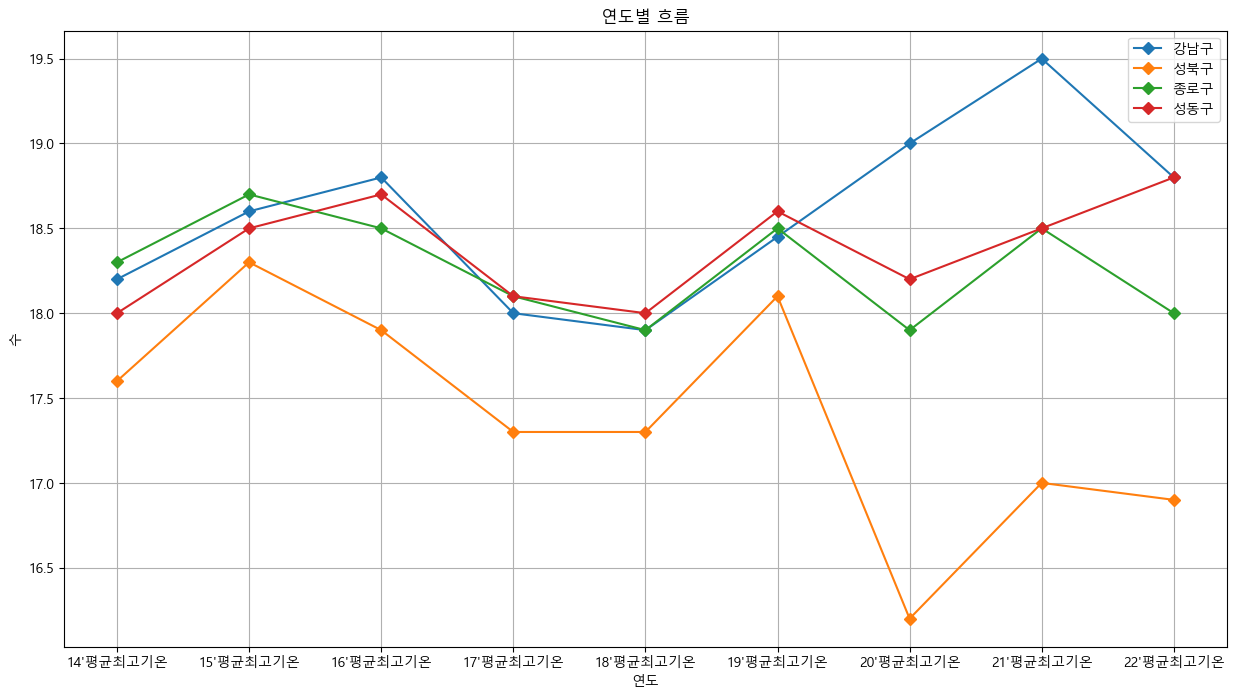

In [400]:
show_plt_part(["강남구","성북구","종로구","성동구"],4)

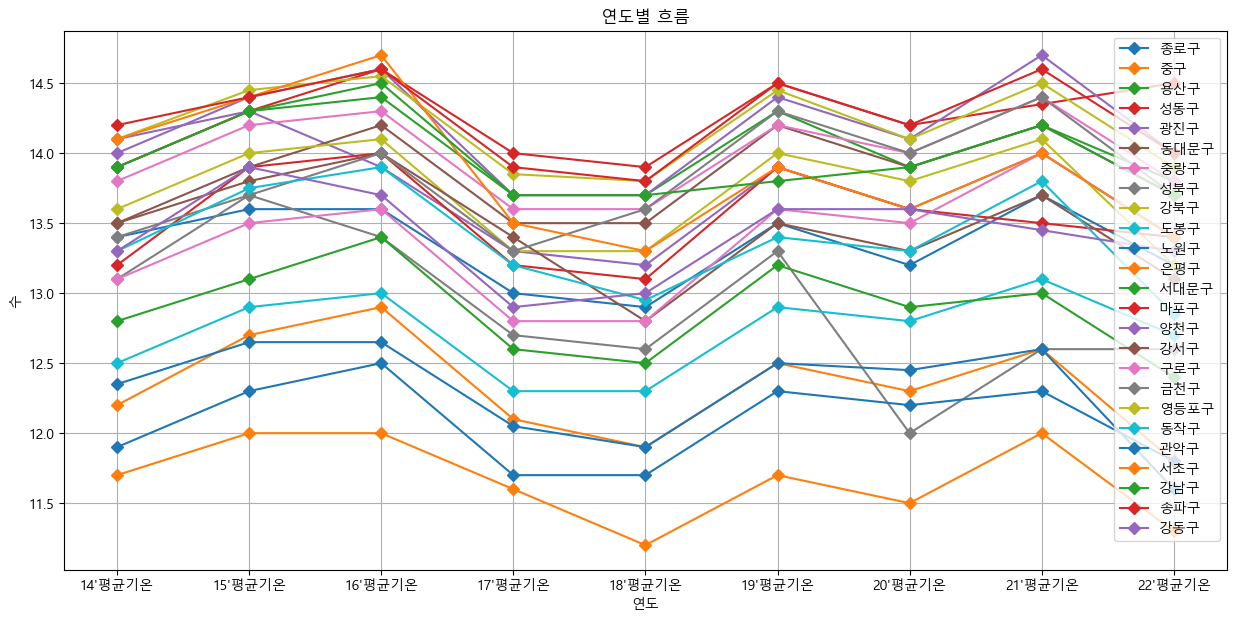

In [401]:
show_plt(3)

- 20년도 성북구 체크

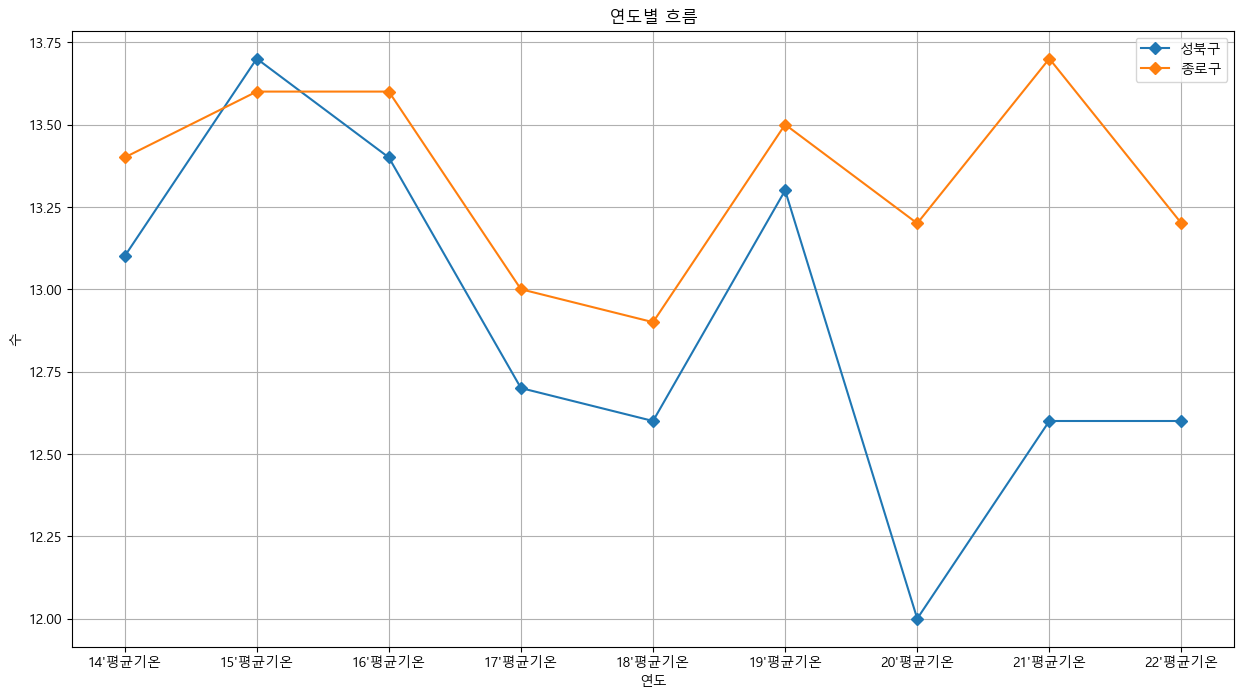

In [402]:
show_plt_part(["성북구","종로구"],3)

- 20년도부터 보면 성북구의 평균기온, 평균최고기온, 최고기운, 평균 최저기온이 급격하게 떨어지는 것이 보인다. 이 4개를 보았을 때 성북구의 최저 온도가 그렇게 낮지 않지만 전체적으로 온도가 낮았다고 볼 수 있을 것 같음

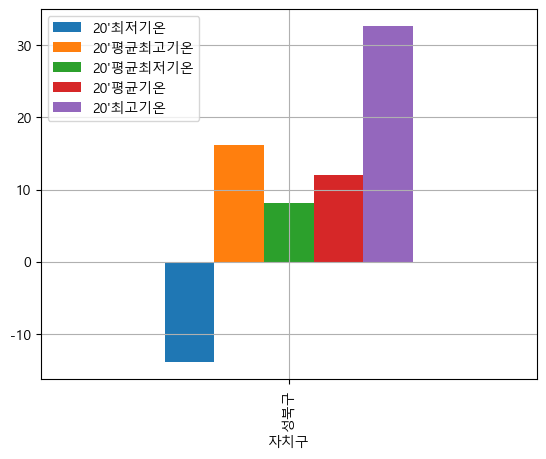

In [403]:
df.loc[["성북구"]].plot(y=["20'최저기온","20'평균최고기온","20'평균최저기온","20'평균기온","20'최고기온"] , kind="bar")
plt.grid(True)
plt.show()

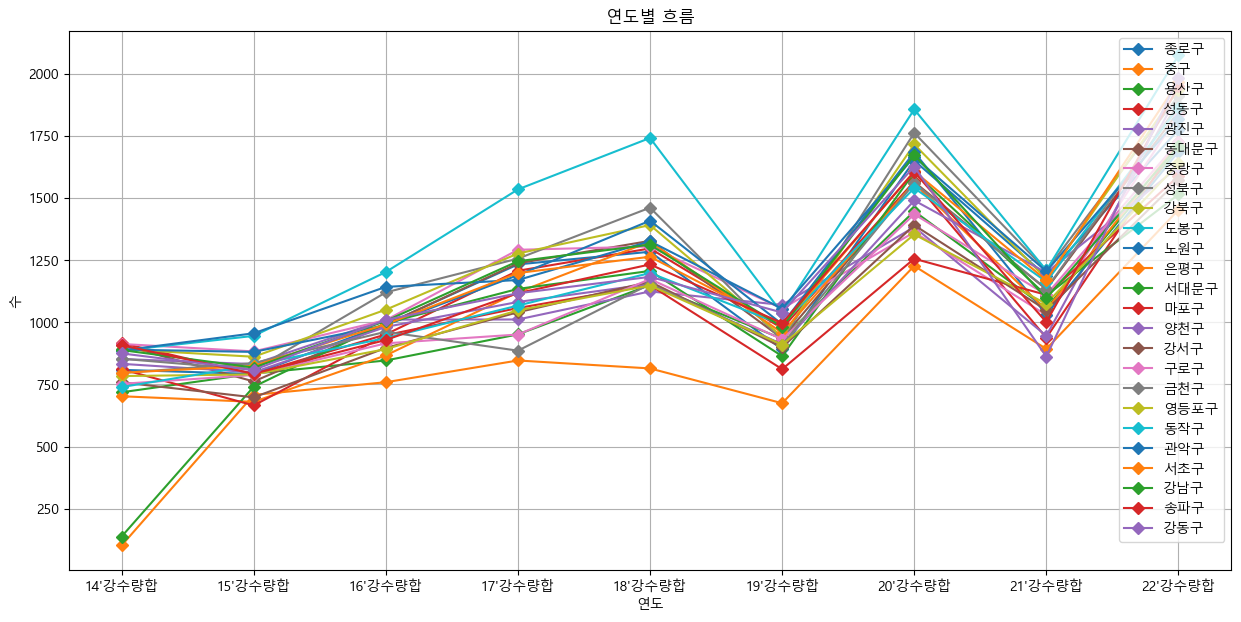

In [404]:
show_plt(7)

- 14년도에 비가 많이 내리지 않았지만 주변구들의 비해 서대문구와 중구의 강수량 차이가 많이 나는 것으로 보임 2개를 이상치로 판단

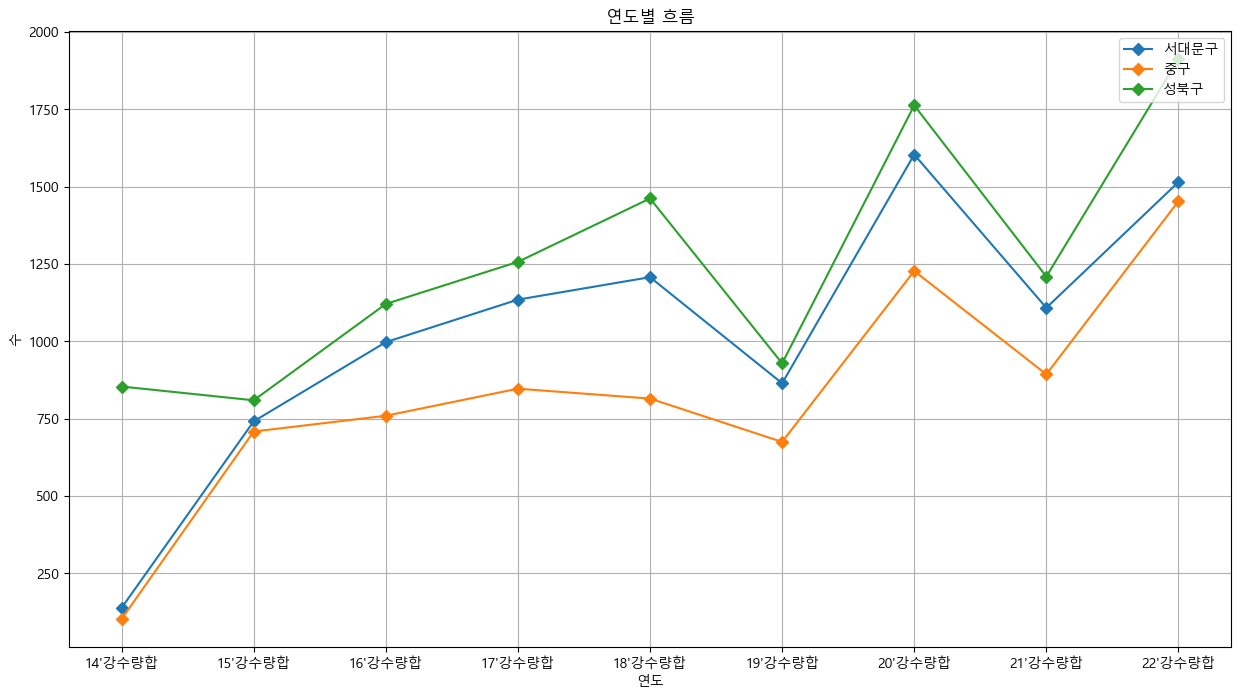

In [405]:
show_plt_part(["서대문구","중구","성북구"],7)

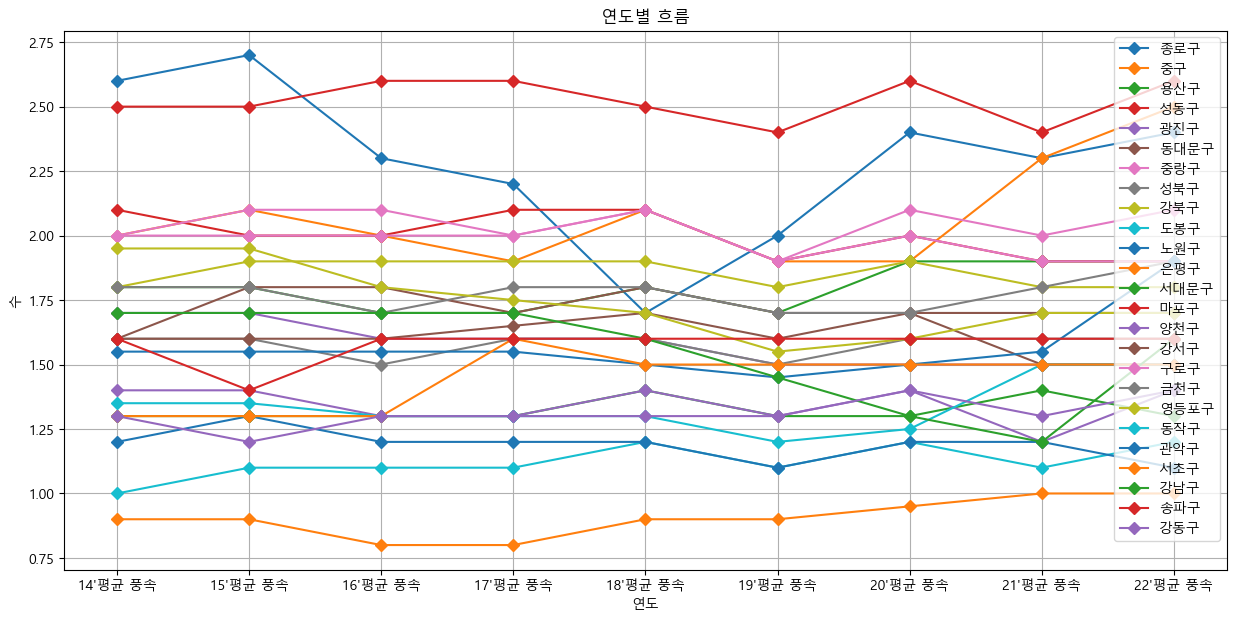

In [406]:
show_plt(5)

- 종로구의 평균 풍속이 다른 구들과 달리 변하고 있지만 주변 값들과 비교했을 때 많이 차이나는 값이 아니라 판단 Novelty Detection 이라고 판단


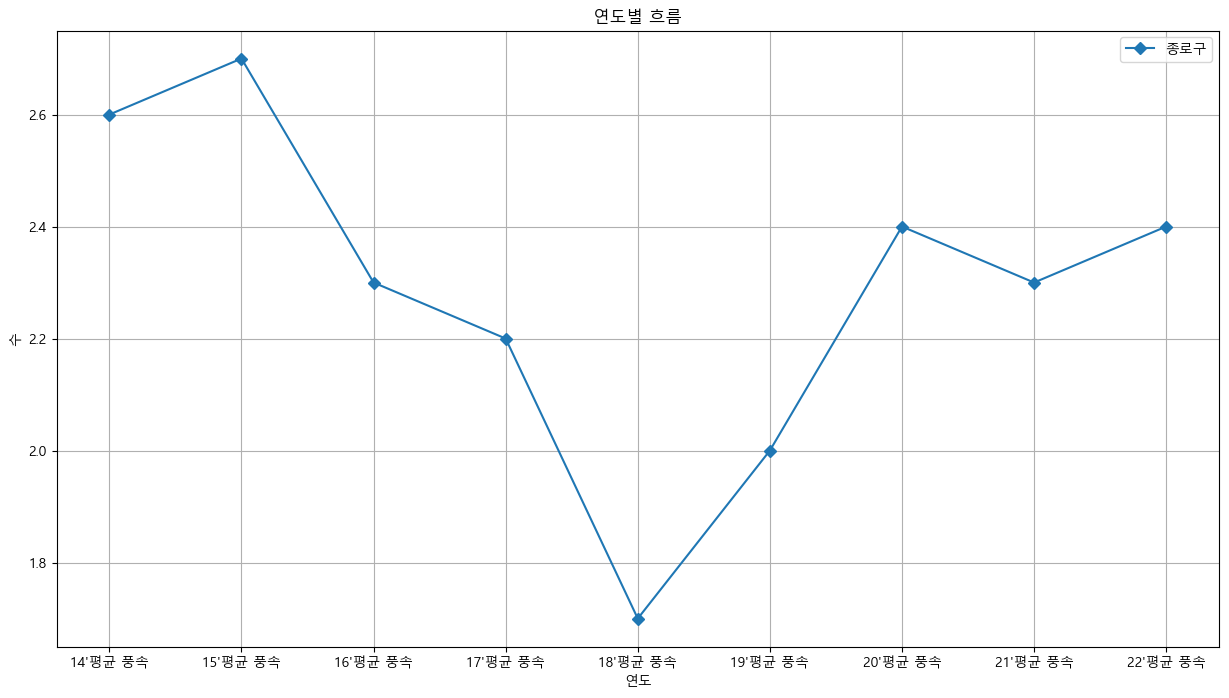

In [410]:
show_plt_part(["종로구"],5)

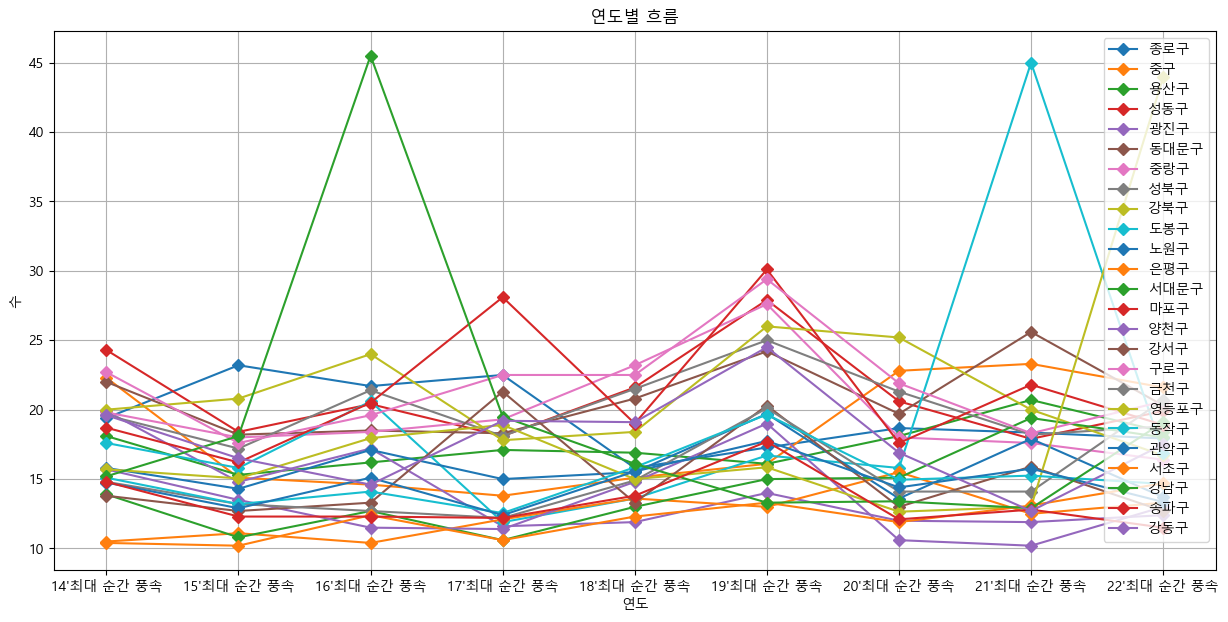

In [407]:
show_plt(6)

- 강남구 도봉구 영등포구 특정 구간에 주변구들과 비교했을 때 2배 정도 차이가 나는 것으로 보임 이상치로 판단
- 태풍의 영향을 생각을 해서 자료를 찾아을때 태풍이 있는 시점도 있지만 하나의 구만 적용된다고는 생각하기 어렵다고 판단함

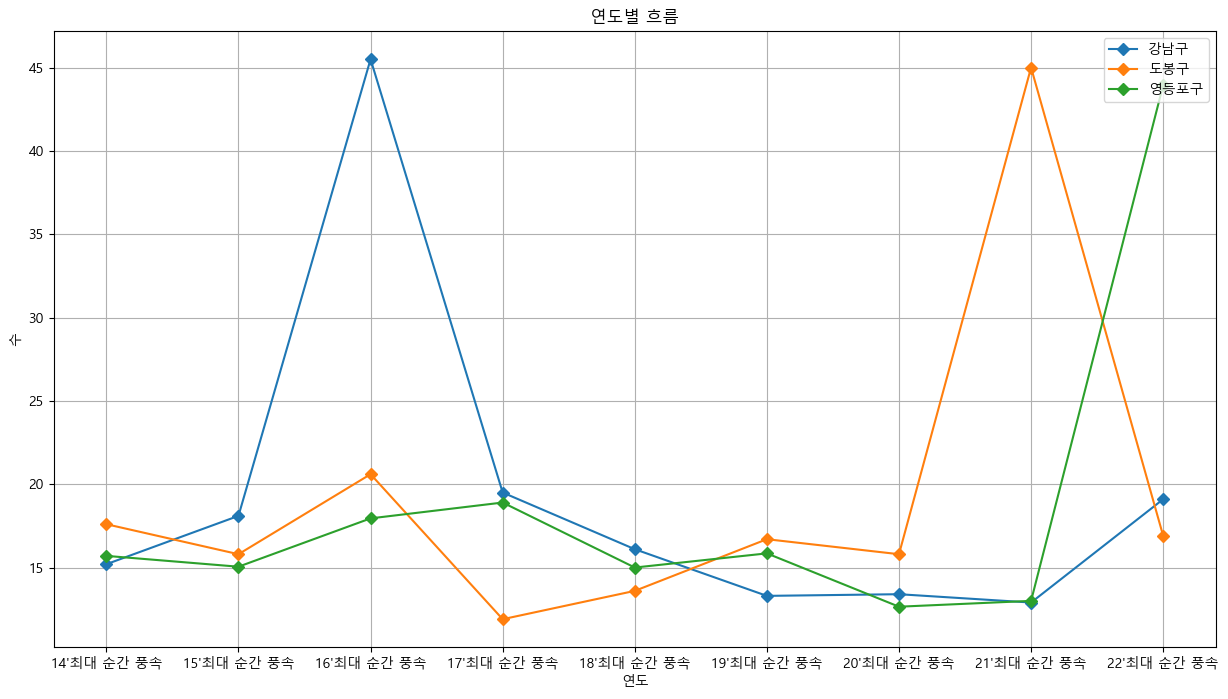

In [408]:
show_plt_part(["강남구","도봉구","영등포구"],6)

- 지가 변동은 크게 이상한 점을 보이지 않음

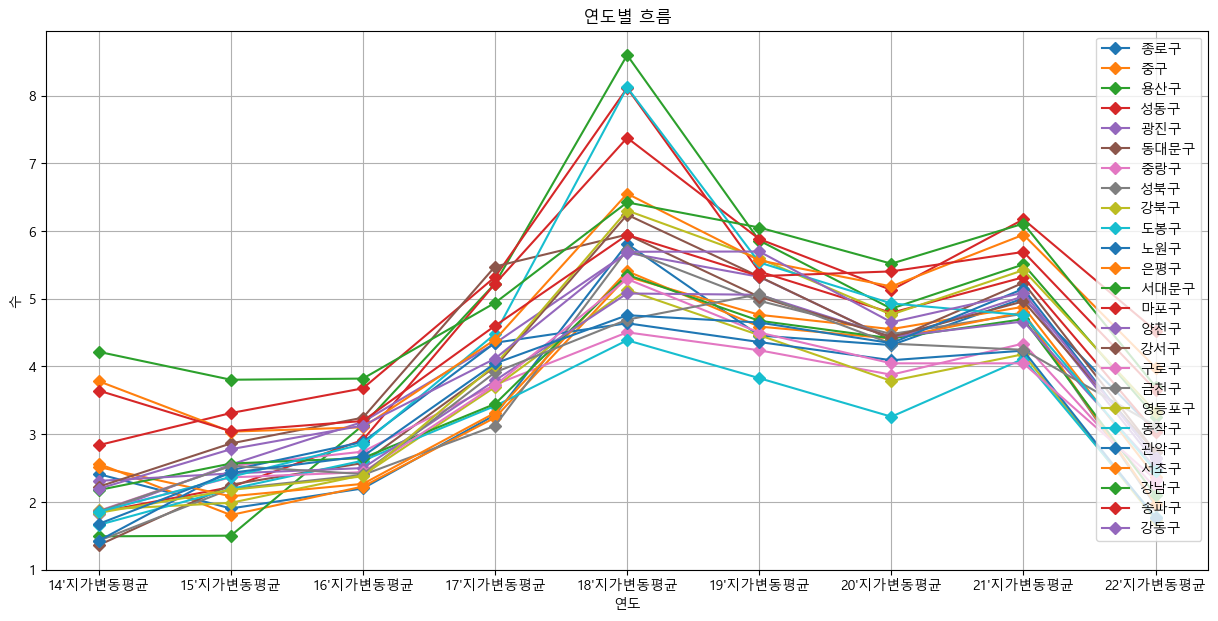

In [409]:
show_plt(8)

- 다음을 이상치라 판단하고 
    - 강수량 합 부분 14년도 서대문구, 중구부분은 최솟값으로 대체
    - 최대순간 풍속 16년도 강남, 21년도 도봉, 22년도 영등포 부분은  최댓값으로 대체

In [435]:
df.loc[["서대문구","중구"],"14'강수량합"] = df.loc[(df.index != "서대문구") & (df.index != "중구"),"14'강수량합"].min()

In [443]:
df.loc[["강남구"],"16'최대 순간 풍속"] =df.loc[df.index != "강남구","16'최대 순간 풍속"].max()
df.loc[["도봉구"],"21'최대 순간 풍속"] =df.loc[df.index != "도봉구","21'최대 순간 풍속"].max()
df.loc[["영등포구"],"22'최대 순간 풍속"] =df.loc[df.index != "영등포구","22'최대 순간 풍속"].max()

In [449]:
# 이상치, 결측치 다 처리한 데이터 프레임
df_fix_list = []
for i in data_list:
    df_t = pd.DataFrame()
    for j in range(14,23):
        df_t = pd.concat([df_t,df.loc[:,f"{j}'{i}"].to_frame()],axis=1)
    df_fix_list.append(df_t)

# 상관관계 확인

In [457]:
y = aa[["자치구","22'발생"]]
y.set_index("자치구",inplace=True)
y.head()

22'발생
자치구       
종로구   3138
중구    3071
용산구   2967
성동구   2194
광진구   3619

In [499]:
df_corr_list = []
for i in df_fix_list:
    df_corr_list.append(pd.concat([i,y],axis=1).corr())

In [510]:
def show_heatmap(corr):# 피쳐들의 상관관계 시각화
    plt.figure(figsize=(8,8))
    sns.set(font_scale = 1.5,font="Malgun Gothic")
    hm = sns.heatmap(corr.values,cbar = True, annot = True, square = True, fmt= ".2f", annot_kws = {"size" : 15},yticklabels = corr.columns
                    , xticklabels = corr.columns)
    plt.tight_layout()
    plt.show()

In [512]:
def show_scatter(df_fix):
    k = pd.concat([df_fix,y],axis=1)
    sns.set(style = "darkgrid")
    plt.rc('font', family='NanumGothic')
    plt.rc('axes', unicode_minus=False)
    sns.pairplot(k,height=1.5)
    plt.show()


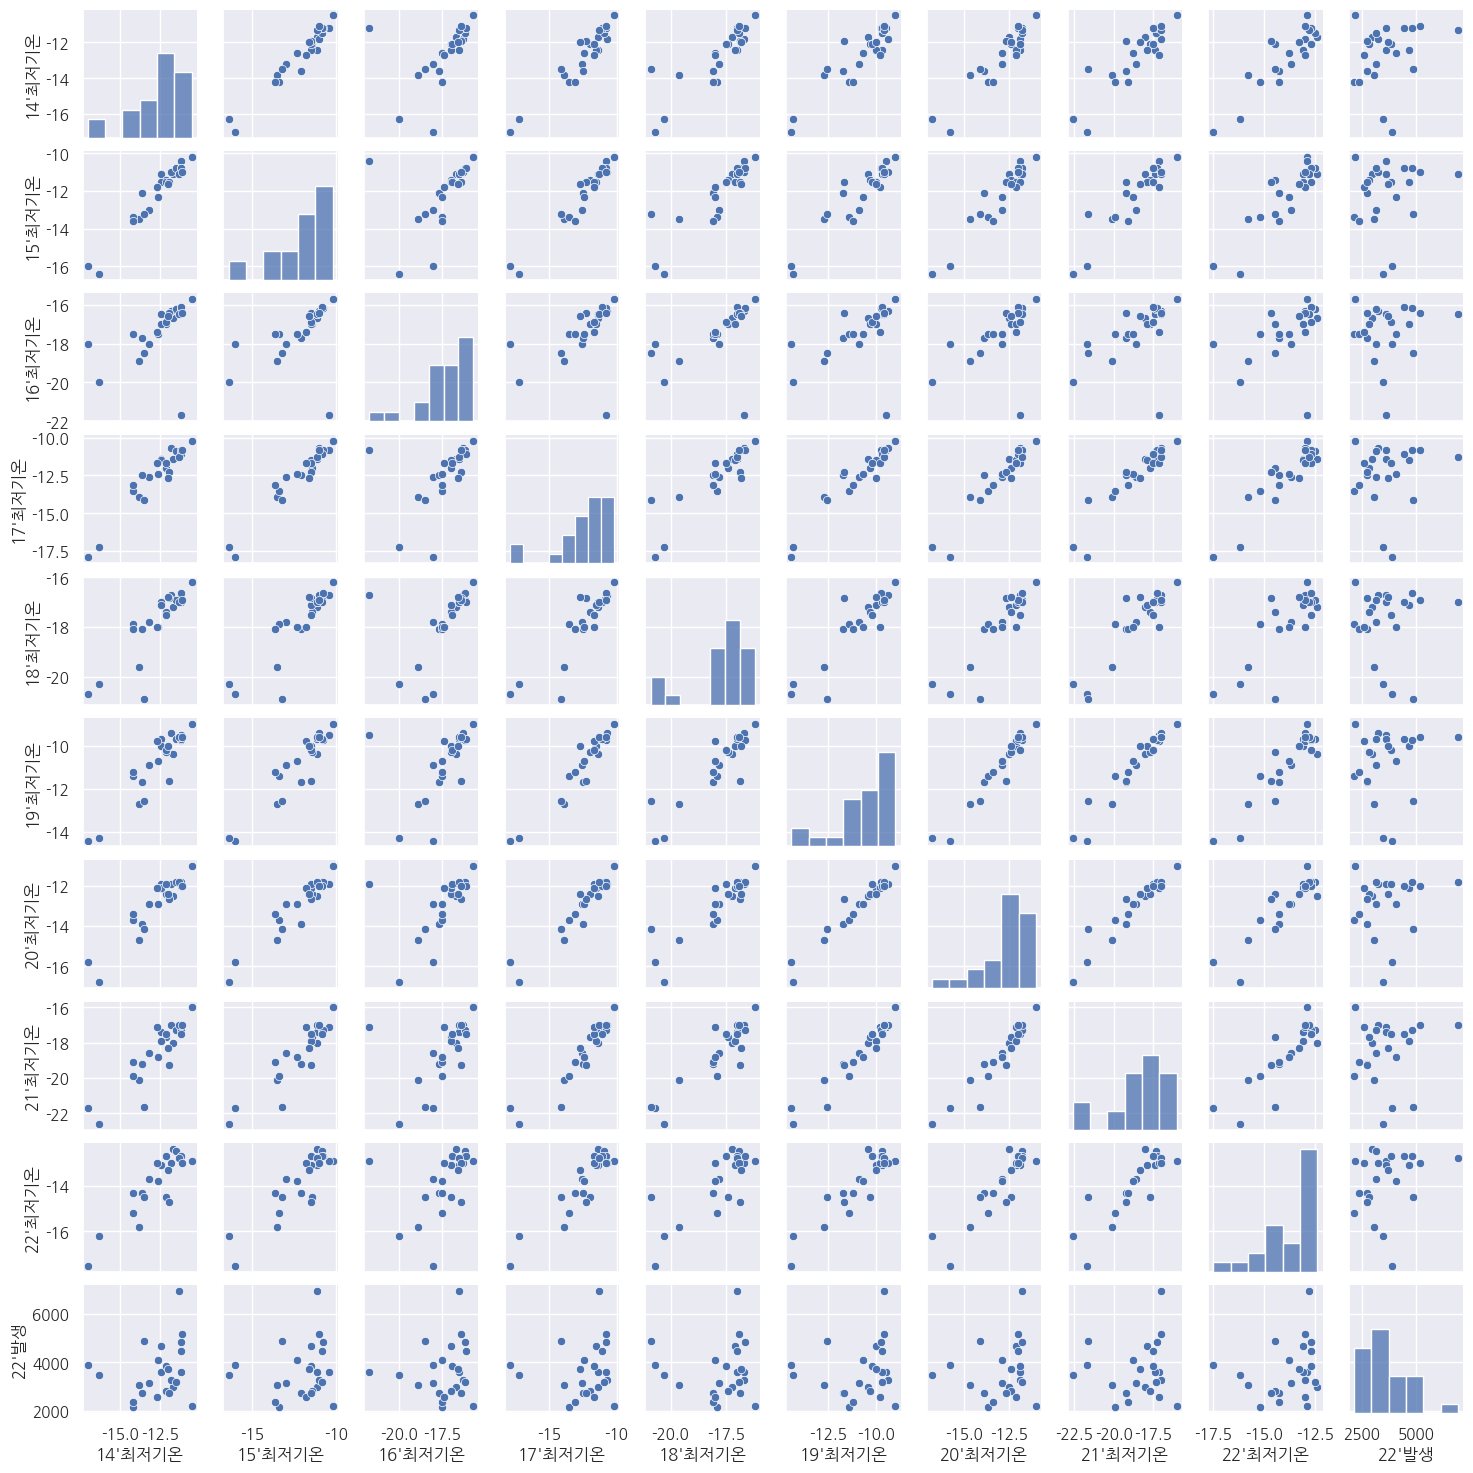

In [513]:
show_scatter(df_fix_list[0])

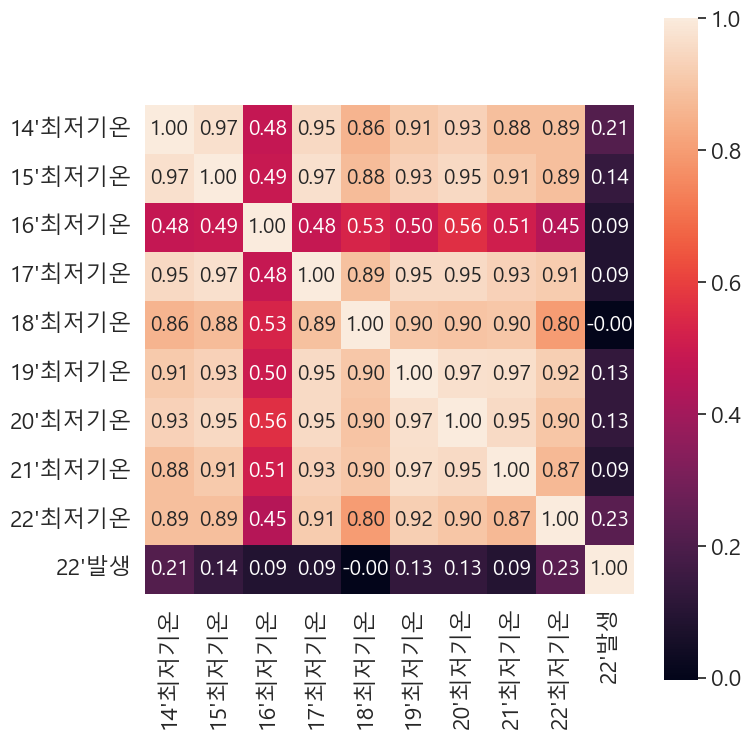

In [511]:
show_heatmap(df_corr_list[0])

In [541]:
# df_corr_list[0][abs(df_corr_list[0]) > 0.3]
df_corr_list[0][(abs(df_corr_list[0]) >= 0.3) | ((0.1 <= abs(df_corr_list[0])) & (abs(df_corr_list[0]) < 0.3))].loc["22'발생"]

14'최저기온    0.213609
15'최저기온    0.138295
16'최저기온         NaN
17'최저기온         NaN
18'최저기온         NaN
19'최저기온    0.132630
20'최저기온    0.131693
21'최저기온         NaN
22'최저기온    0.228713
22'발생      1.000000
Name: 22'발생, dtype: float64

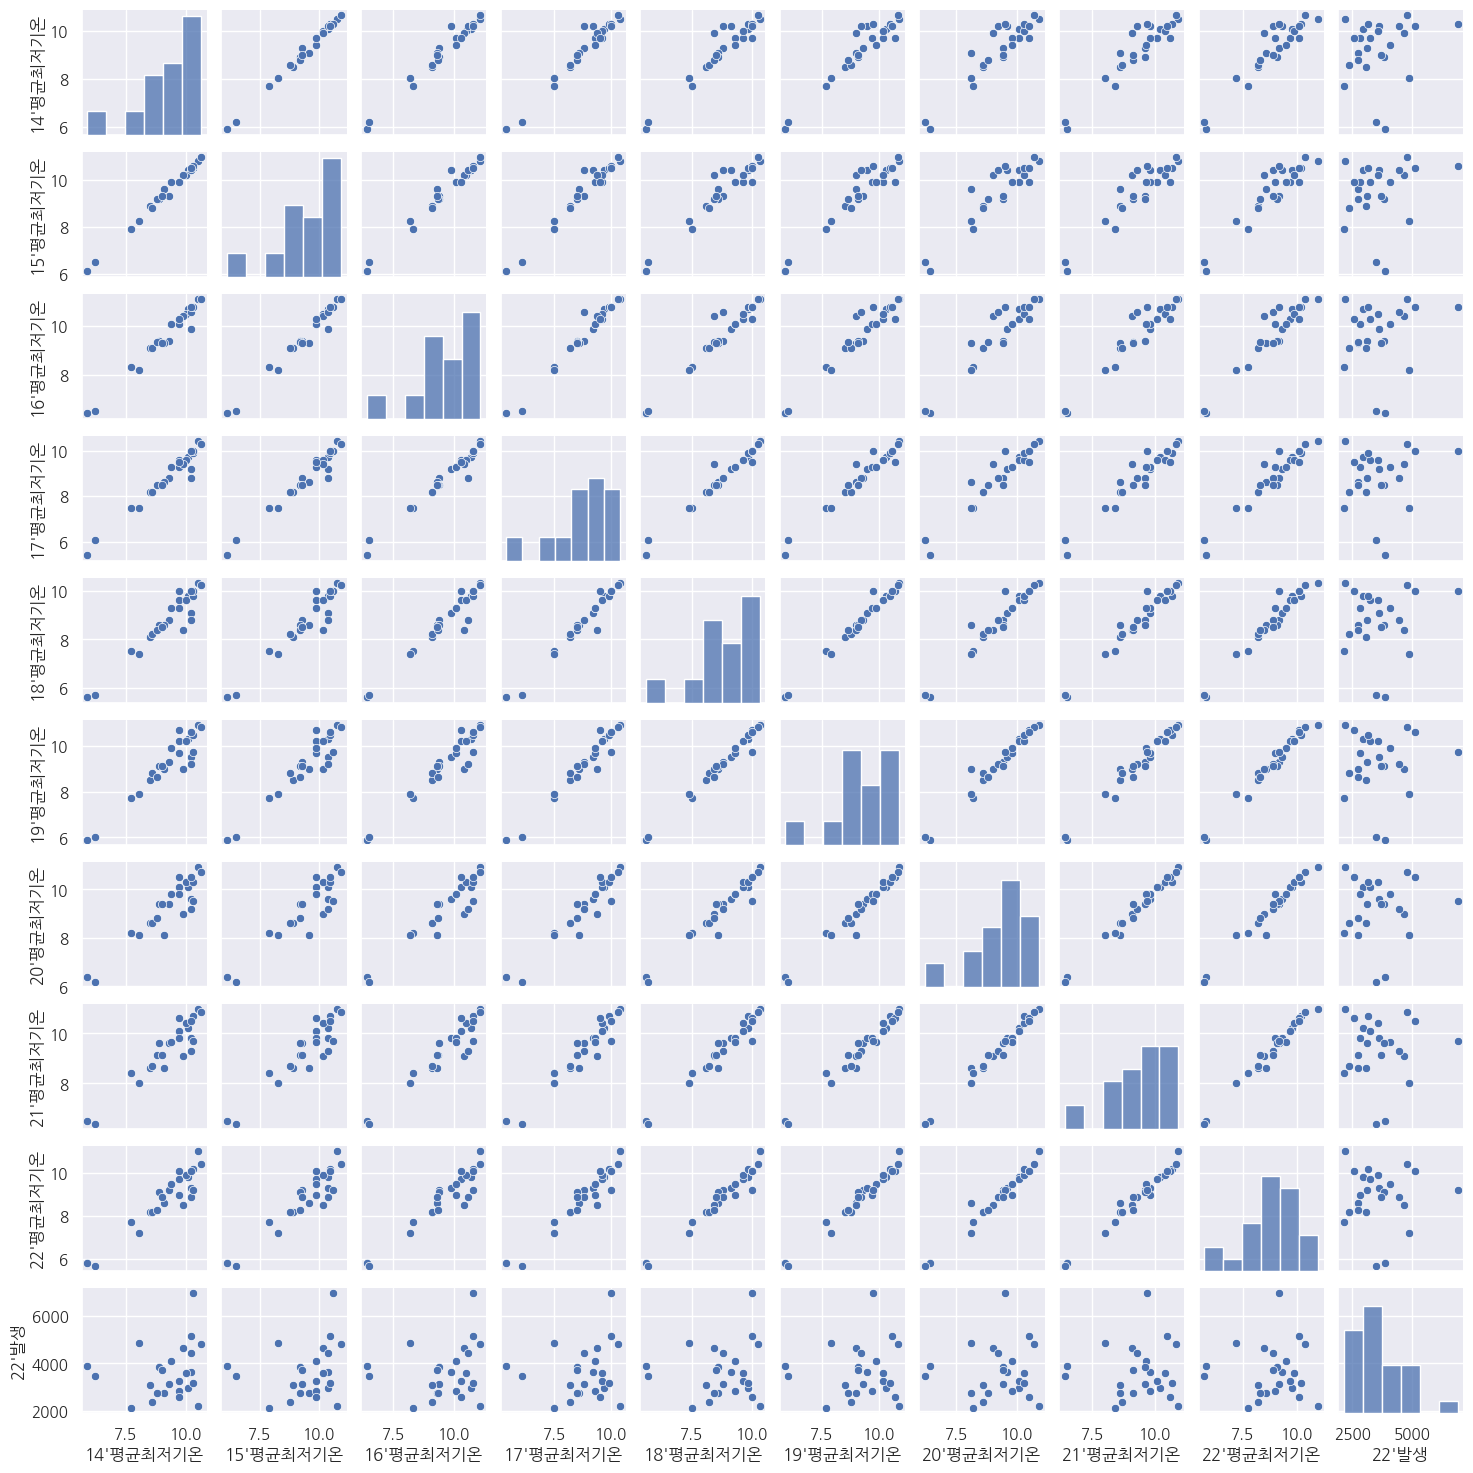

In [515]:
show_scatter(df_fix_list[1])

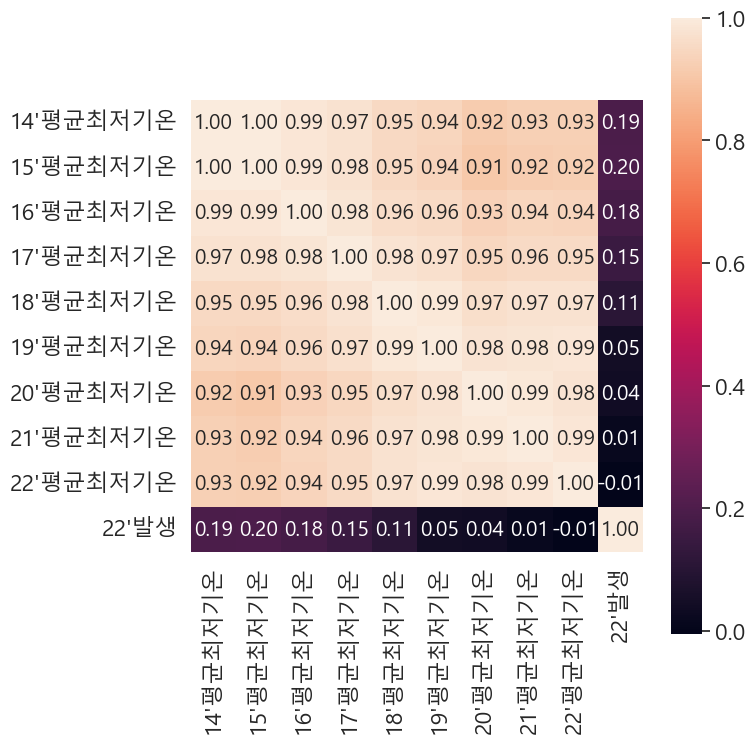

In [514]:
show_heatmap(df_corr_list[1])

In [542]:
df_corr_list[1][(abs(df_corr_list[1]) >= 0.3) | ((0.1 <= abs(df_corr_list[1])) & (abs(df_corr_list[1]) < 0.3))].loc["22'발생"]

14'평균최저기온    0.192167
15'평균최저기온    0.198093
16'평균최저기온    0.175982
17'평균최저기온    0.150362
18'평균최저기온    0.105791
19'평균최저기온         NaN
20'평균최저기온         NaN
21'평균최저기온         NaN
22'평균최저기온         NaN
22'발생        1.000000
Name: 22'발생, dtype: float64

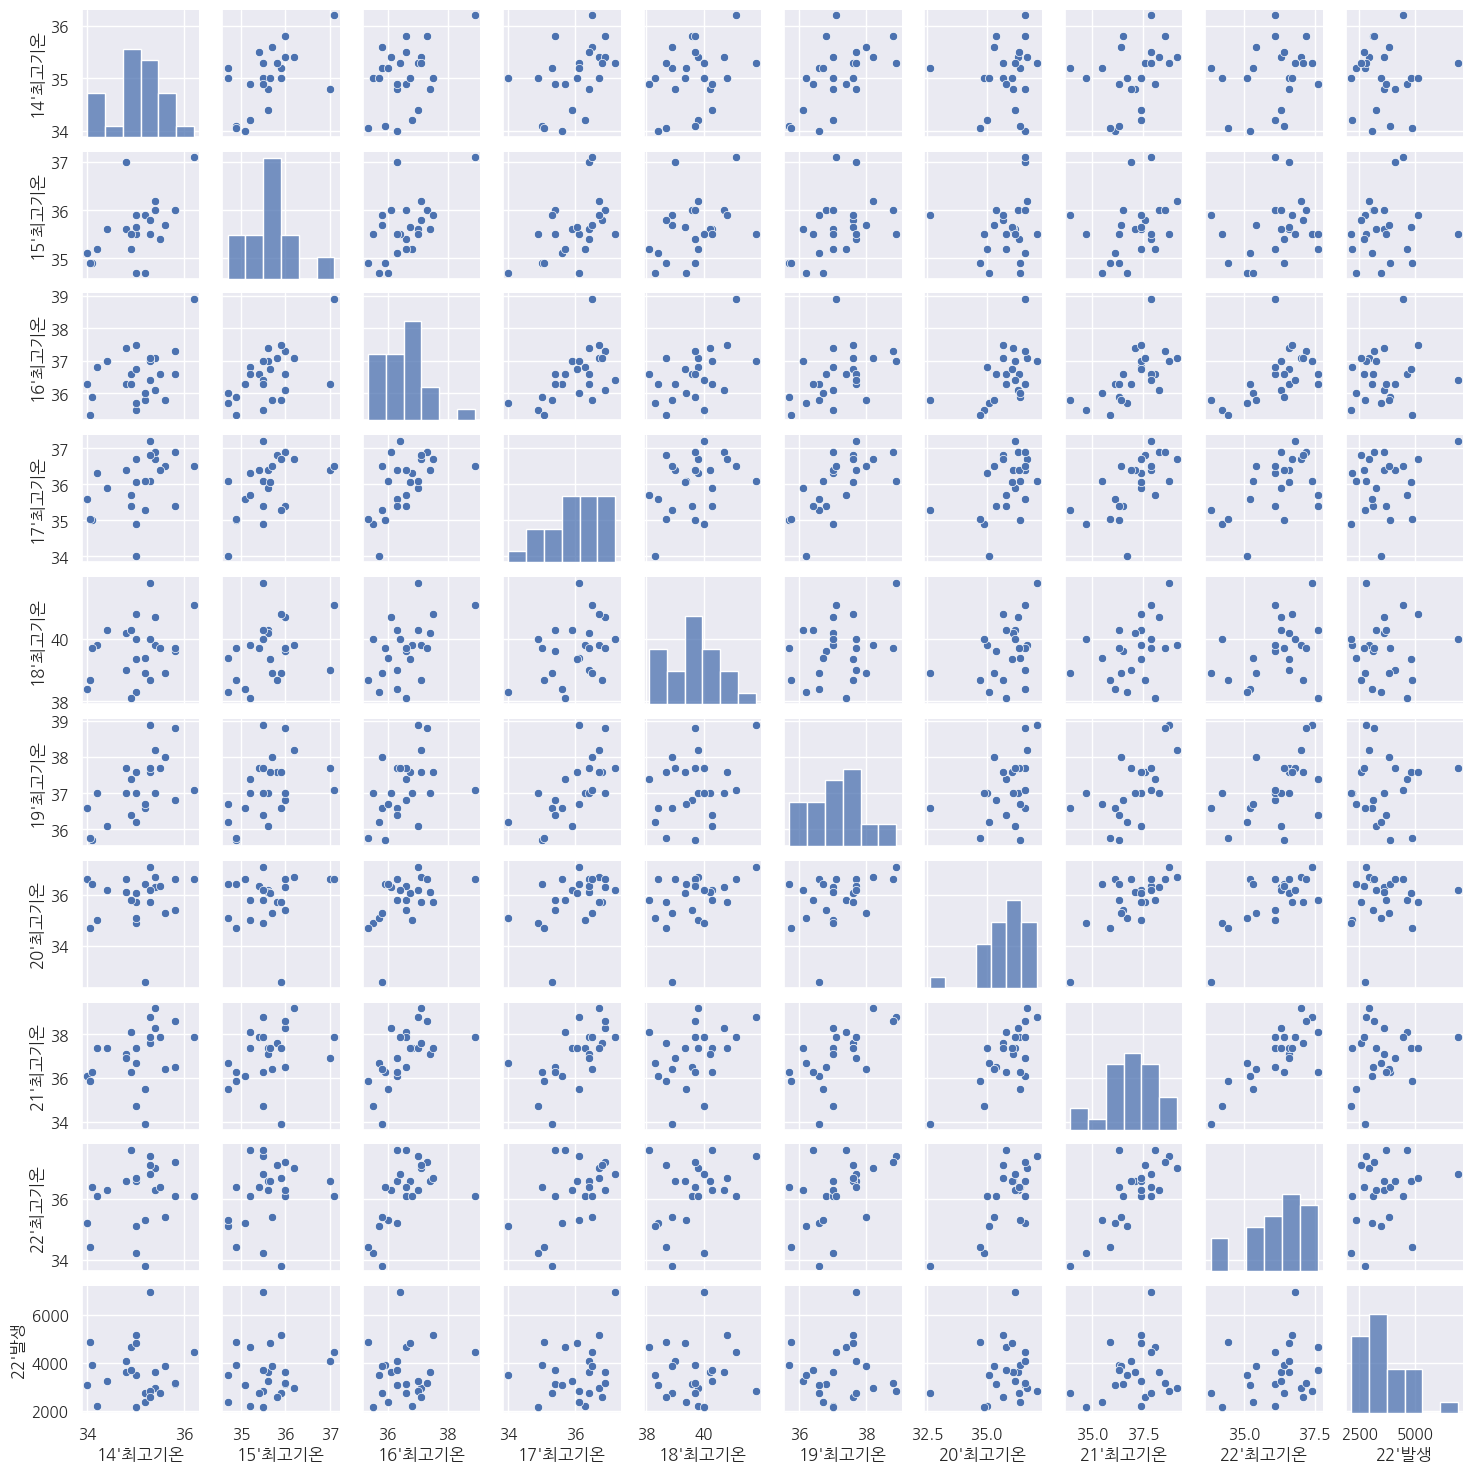

In [543]:
show_scatter(df_fix_list[2])

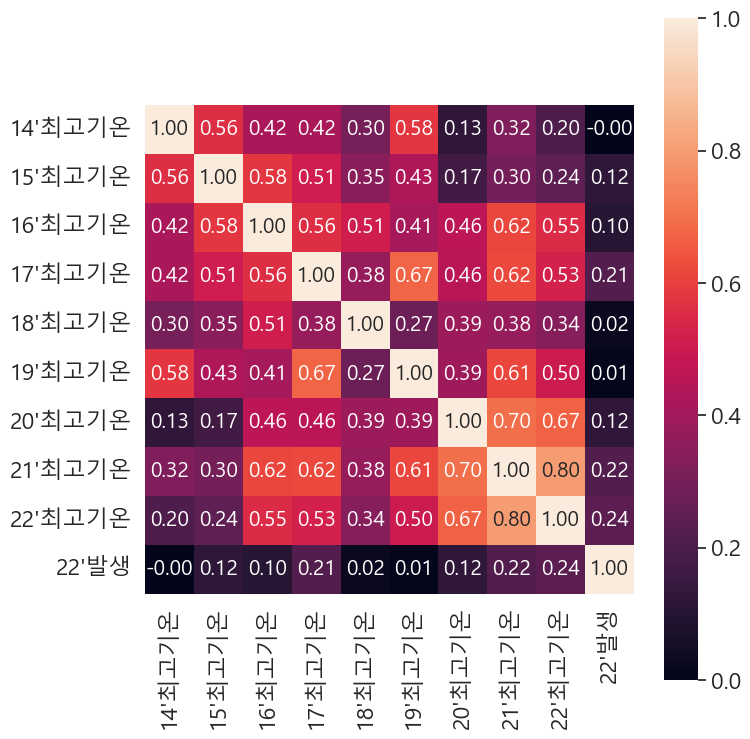

In [544]:
show_heatmap(df_corr_list[2])

In [545]:
df_corr_list[2][(abs(df_corr_list[1]) >= 0.3) | ((0.1 <= abs(df_corr_list[2])) & (abs(df_corr_list[2]) < 0.3))].loc["22'발생"]

14'최고기온    NaN
15'최고기온    NaN
16'최고기온    NaN
17'최고기온    NaN
18'최고기온    NaN
19'최고기온    NaN
20'최고기온    NaN
21'최고기온    NaN
22'최고기온    NaN
22'발생      1.0
Name: 22'발생, dtype: float64

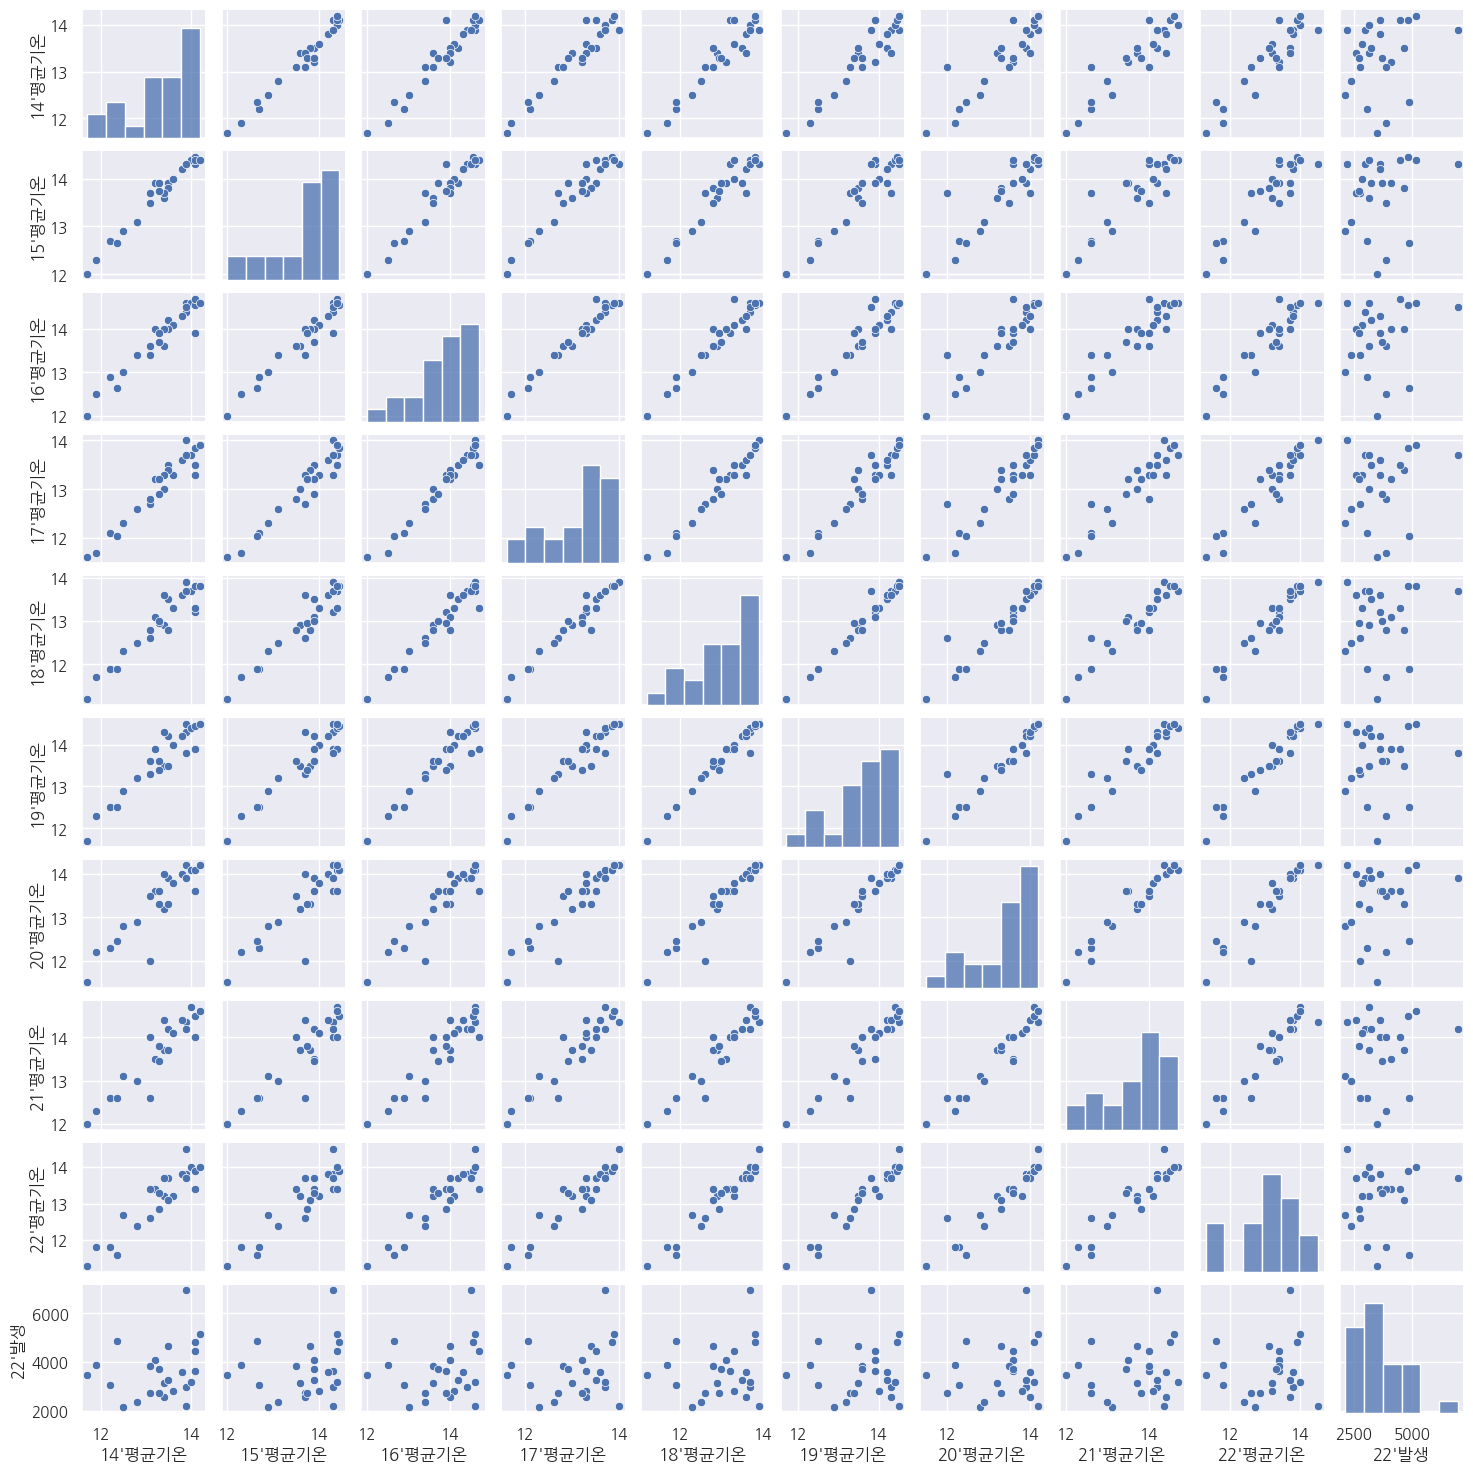

In [516]:
show_scatter(df_fix_list[3])

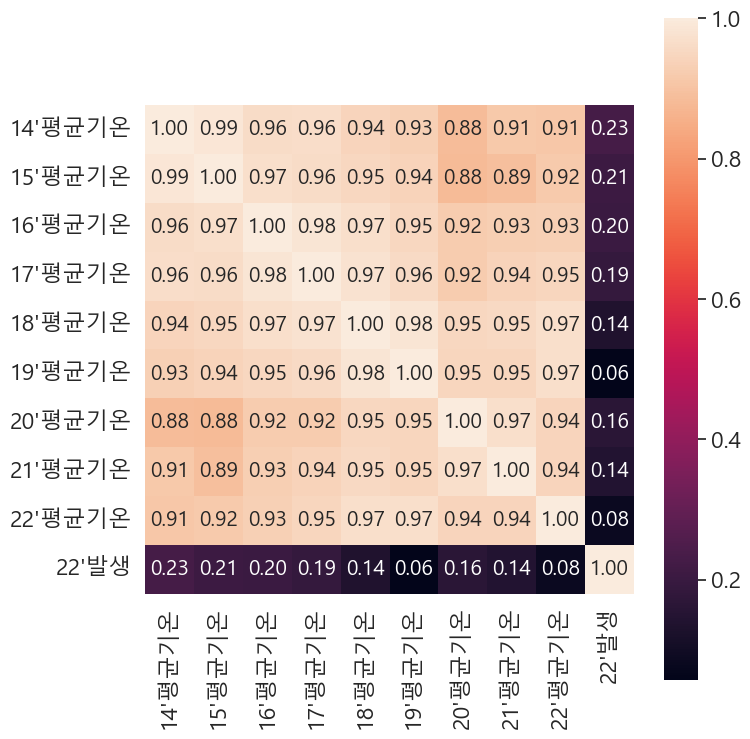

In [517]:
show_heatmap(df_corr_list[3])

In [546]:
df_corr_list[3][(abs(df_corr_list[3]) >= 0.3) | ((0.1 <= abs(df_corr_list[3])) & (abs(df_corr_list[3]) < 0.3))].loc["22'발생"]

14'평균기온    0.227927
15'평균기온    0.207068
16'평균기온    0.203676
17'평균기온    0.188437
18'평균기온    0.136103
19'평균기온         NaN
20'평균기온    0.162981
21'평균기온    0.144442
22'평균기온         NaN
22'발생      1.000000
Name: 22'발생, dtype: float64

In [465]:
show_scatter(df_fix_list[4])

14'평균최고기온  15'평균최고기온  16'평균최고기온  17'평균최고기온  18'평균최고기온  19'평균최고기온  \
14'평균최고기온   1.000000   0.898516   0.864471   0.861489   0.848453   0.772892   
15'평균최고기온   0.898516   1.000000   0.889806   0.841622   0.857536   0.810387   
16'평균최고기온   0.864471   0.889806   1.000000   0.942810   0.912292   0.874488   
17'평균최고기온   0.861489   0.841622   0.942810   1.000000   0.904585   0.843592   
18'평균최고기온   0.848453   0.857536   0.912292   0.904585   1.000000   0.960333   
19'평균최고기온   0.772892   0.810387   0.874488   0.843592   0.960333   1.000000   
20'평균최고기온   0.638736   0.576077   0.719000   0.702403   0.746424   0.709915   
21'평균최고기온   0.674309   0.555024   0.694864   0.720038   0.746670   0.693402   
22'평균최고기온   0.595260   0.642666   0.718483   0.756481   0.799917   0.743872   
22'발생       0.167731   0.126509   0.201441   0.181863   0.026120  -0.062461   

           20'평균최고기온  21'평균최고기온  22'평균최고기온     22'발생  
14'평균최고기온   0.638736   0.674309   0.595260  0.167731  
15'평균최고기온   0.576077   0.555024   0.642666  0.126509  
16'평균최고기온   0.719000   0.694864   0.718483  0.201441  
17'평균최고기온   0.702403   0.720038   0.756481  0.181863  
18'평균최고기온   0.746424   0.746670   0.799917  0.026120  
19'평균최고기온   0.709915   0.693402   0.743872 -0.062461  
20'평균최고기온   1.000000   0.907503   0.817026  0.266978  
21'평균최고기온   0.907503   1.000000   0.831004  0.320820  
22'평균최고기온   0.817026   0.831004   1.000000  0.215219  
22'발생       0.266978   0.320820   0.215219  1.000000

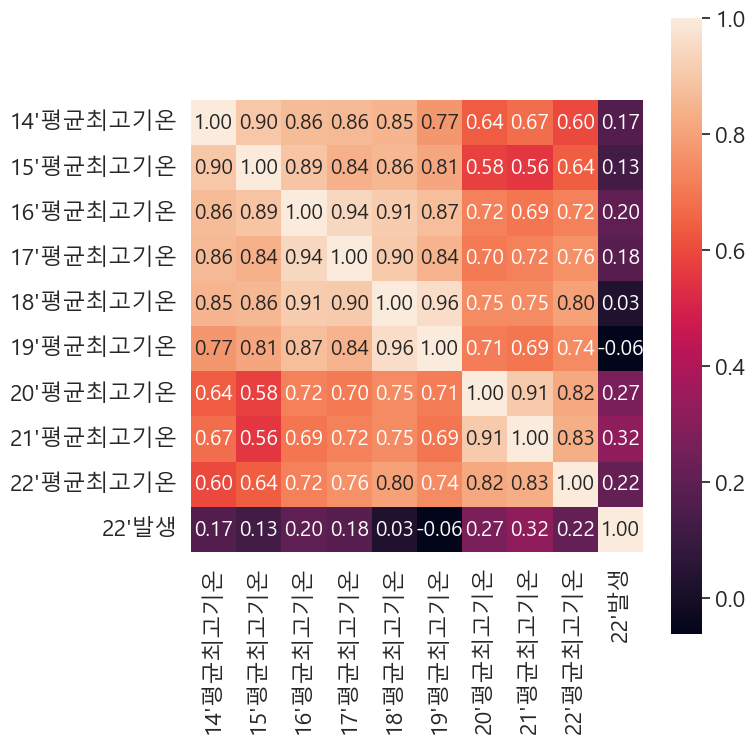

In [518]:
show_heatmap(df_corr_list[4])

In [547]:
df_corr_list[4][(abs(df_corr_list[4]) >= 0.3) | ((0.1 <= abs(df_corr_list[4])) & (abs(df_corr_list[4]) < 0.3))].loc["22'발생"]

14'평균최고기온    0.167731
15'평균최고기온    0.126509
16'평균최고기온    0.201441
17'평균최고기온    0.181863
18'평균최고기온         NaN
19'평균최고기온         NaN
20'평균최고기온    0.266978
21'평균최고기온    0.320820
22'평균최고기온    0.215219
22'발생        1.000000
Name: 22'발생, dtype: float64

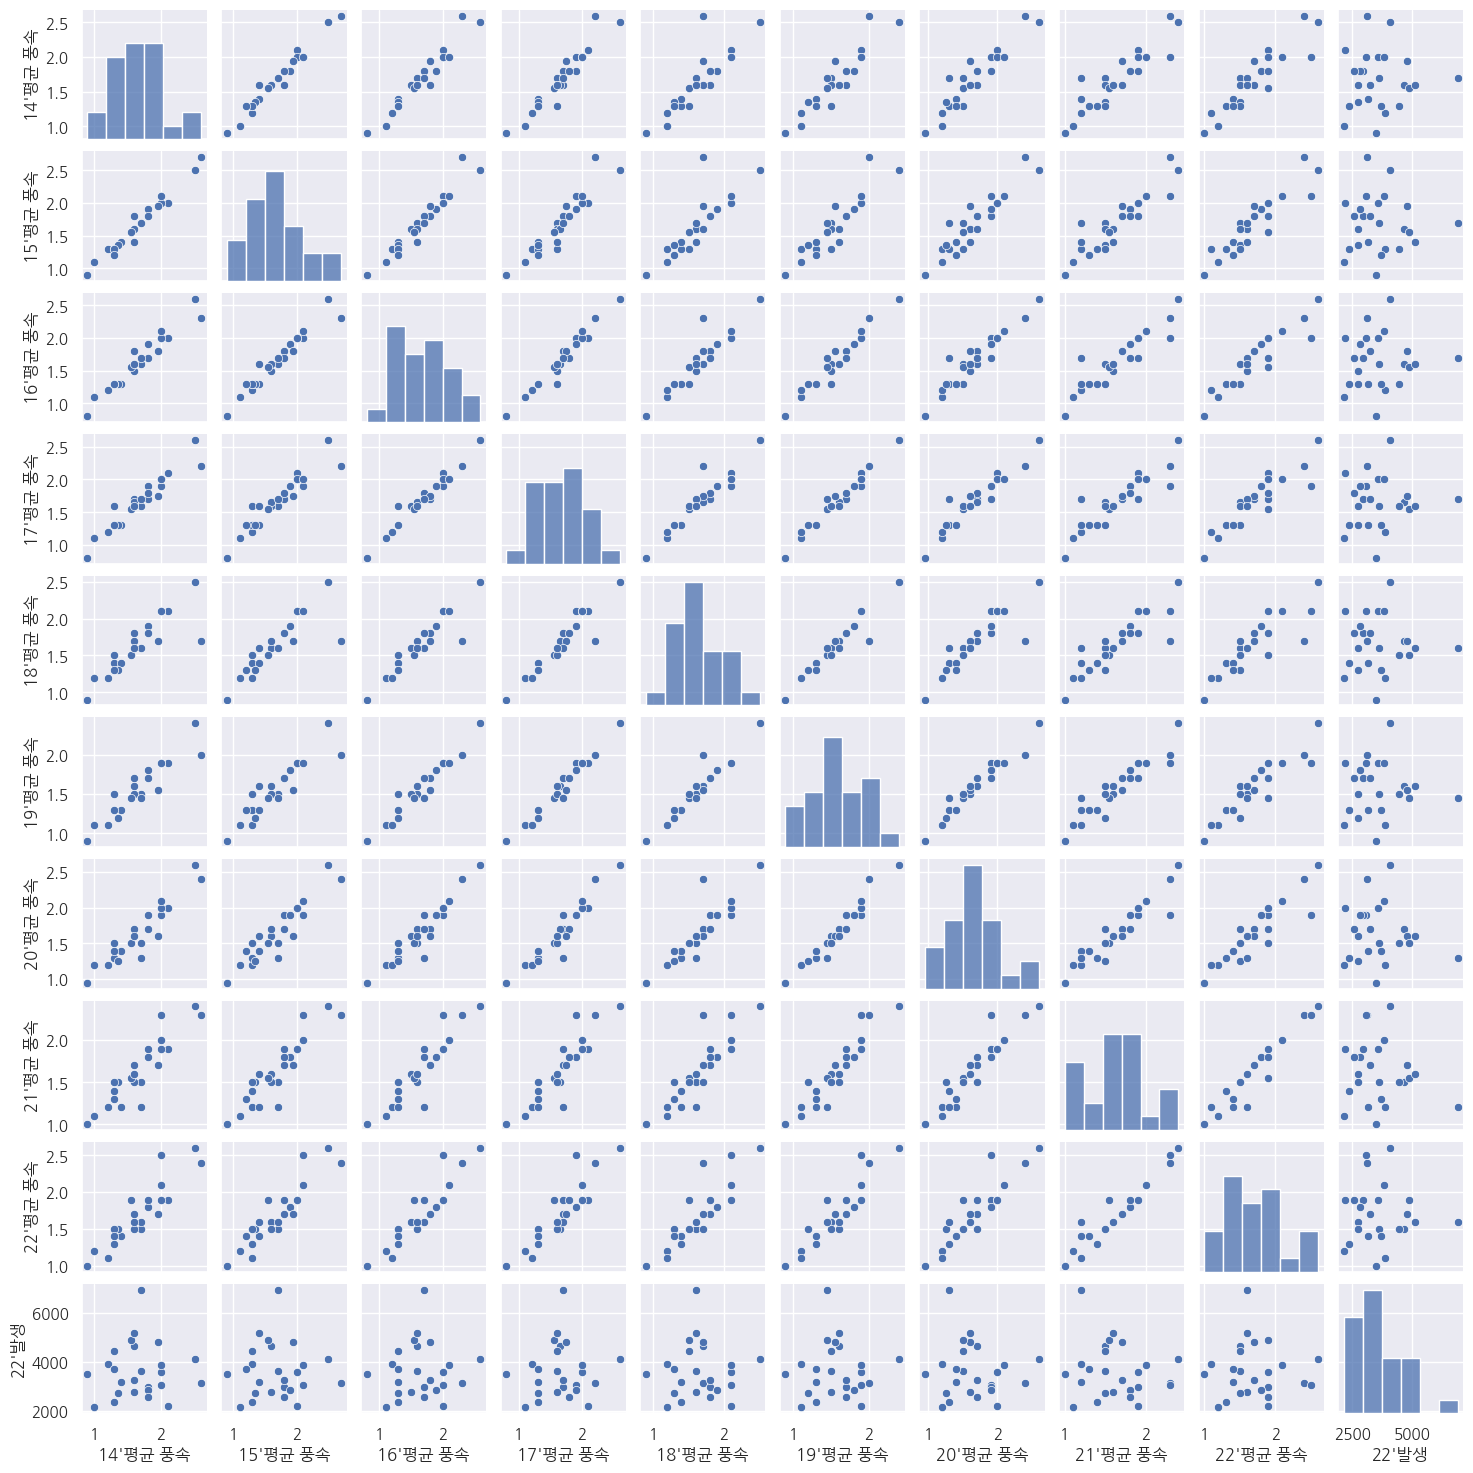

In [519]:
show_scatter(df_fix_list[5])

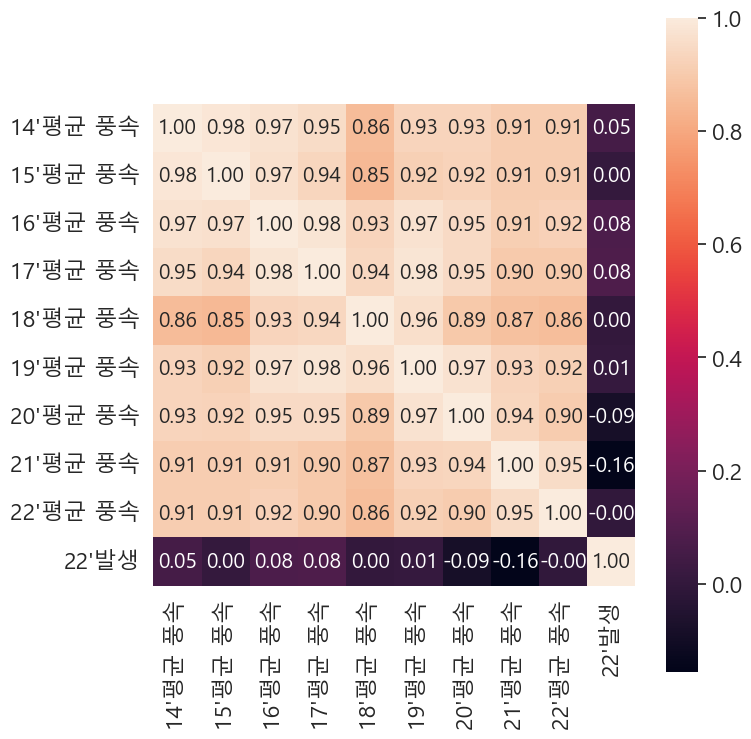

In [526]:
show_heatmap(df_corr_list[5])

In [548]:
df_corr_list[5][(abs(df_corr_list[5]) >= 0.3) | ((0.1 <= abs(df_corr_list[5])) & (abs(df_corr_list[5]) < 0.3))].loc["22'발생"]

14'평균 풍속         NaN
15'평균 풍속         NaN
16'평균 풍속         NaN
17'평균 풍속         NaN
18'평균 풍속         NaN
19'평균 풍속         NaN
20'평균 풍속         NaN
21'평균 풍속   -0.155288
22'평균 풍속         NaN
22'발생       1.000000
Name: 22'발생, dtype: float64

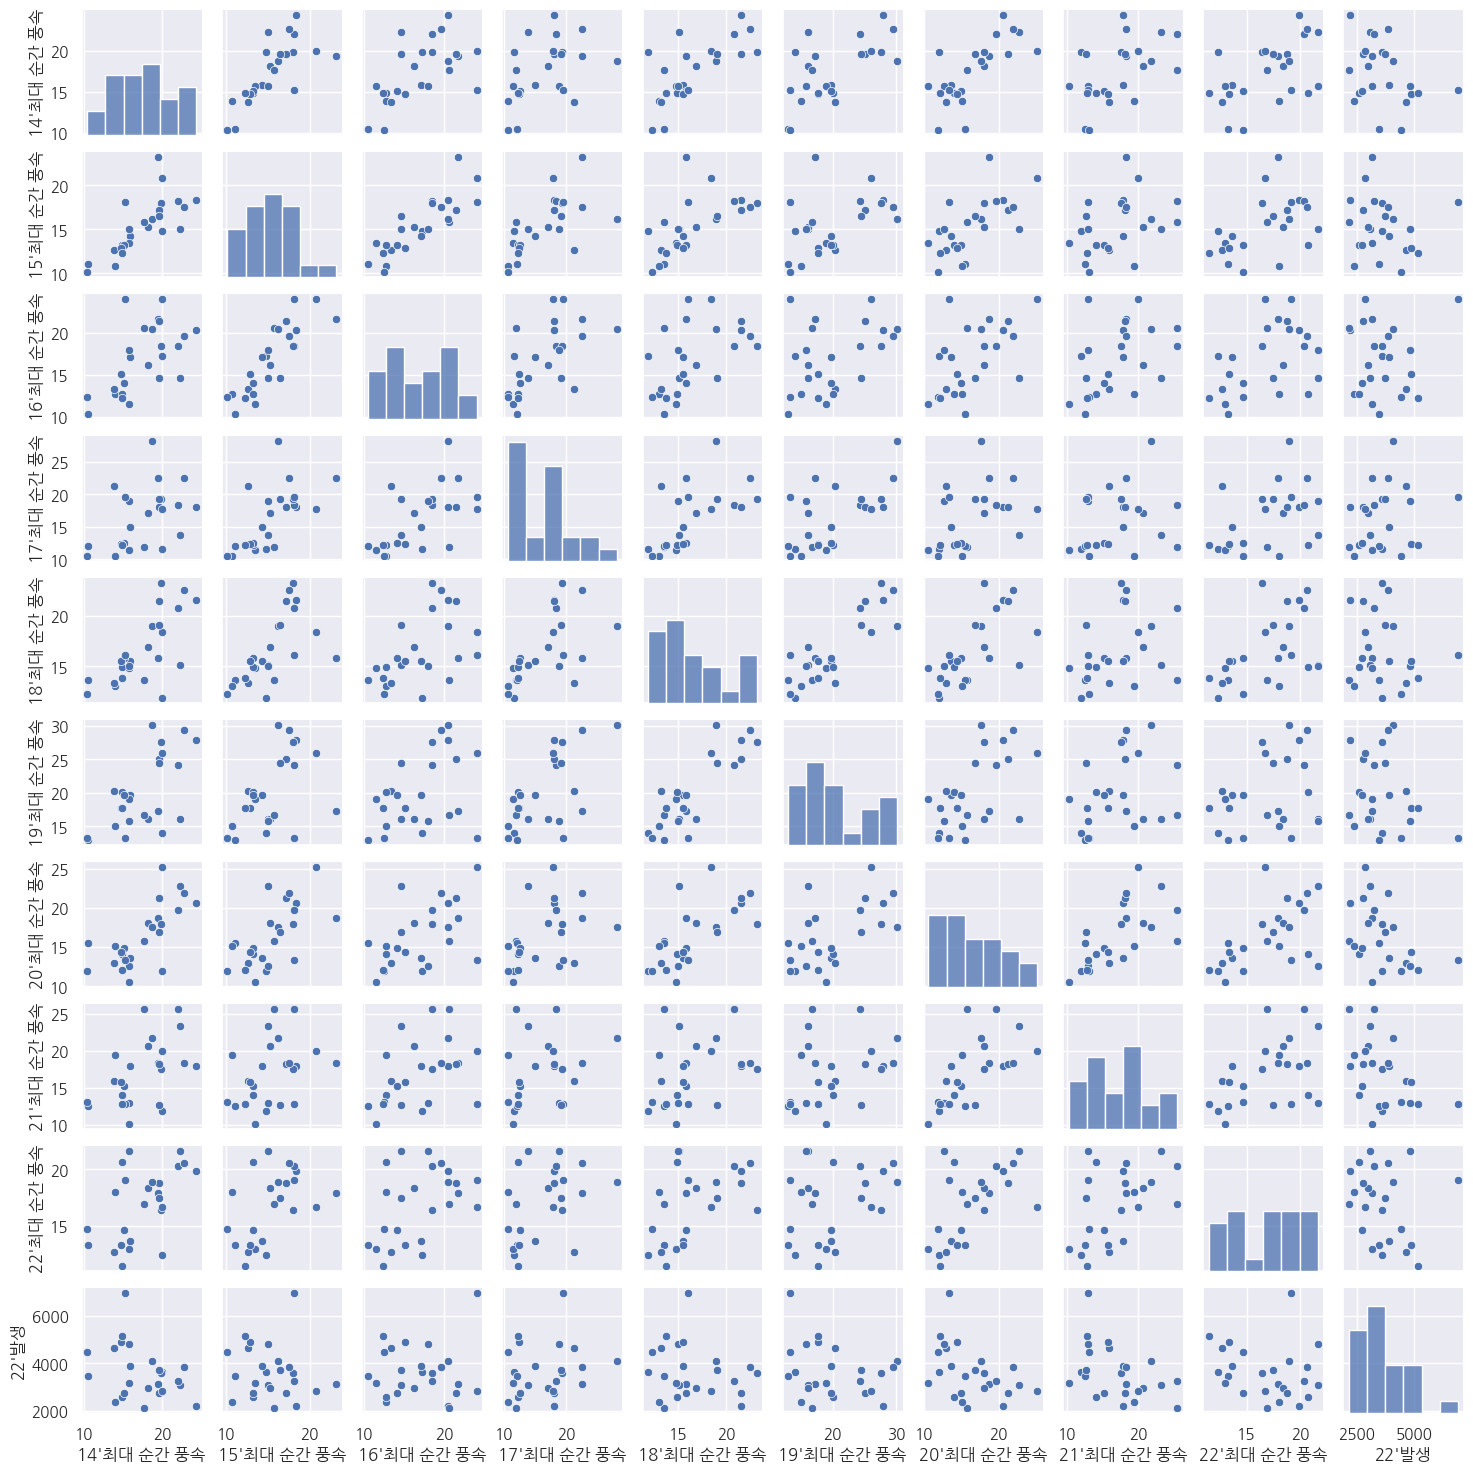

In [520]:
show_scatter(df_fix_list[6])

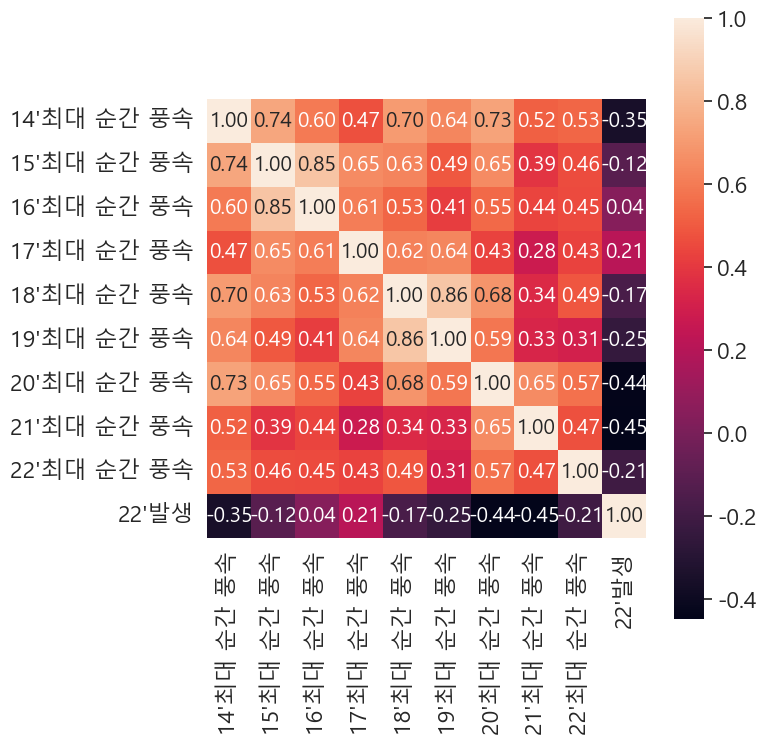

In [521]:
show_heatmap(df_corr_list[6])

In [549]:
df_corr_list[6][(abs(df_corr_list[6]) >= 0.3) | ((0.1 <= abs(df_corr_list[6])) & (abs(df_corr_list[6]) < 0.3))].loc["22'발생"]

14'최대 순간 풍속   -0.353736
15'최대 순간 풍속   -0.118087
16'최대 순간 풍속         NaN
17'최대 순간 풍속    0.211504
18'최대 순간 풍속   -0.168086
19'최대 순간 풍속   -0.247710
20'최대 순간 풍속   -0.439825
21'최대 순간 풍속   -0.447255
22'최대 순간 풍속   -0.207634
22'발생          1.000000
Name: 22'발생, dtype: float64

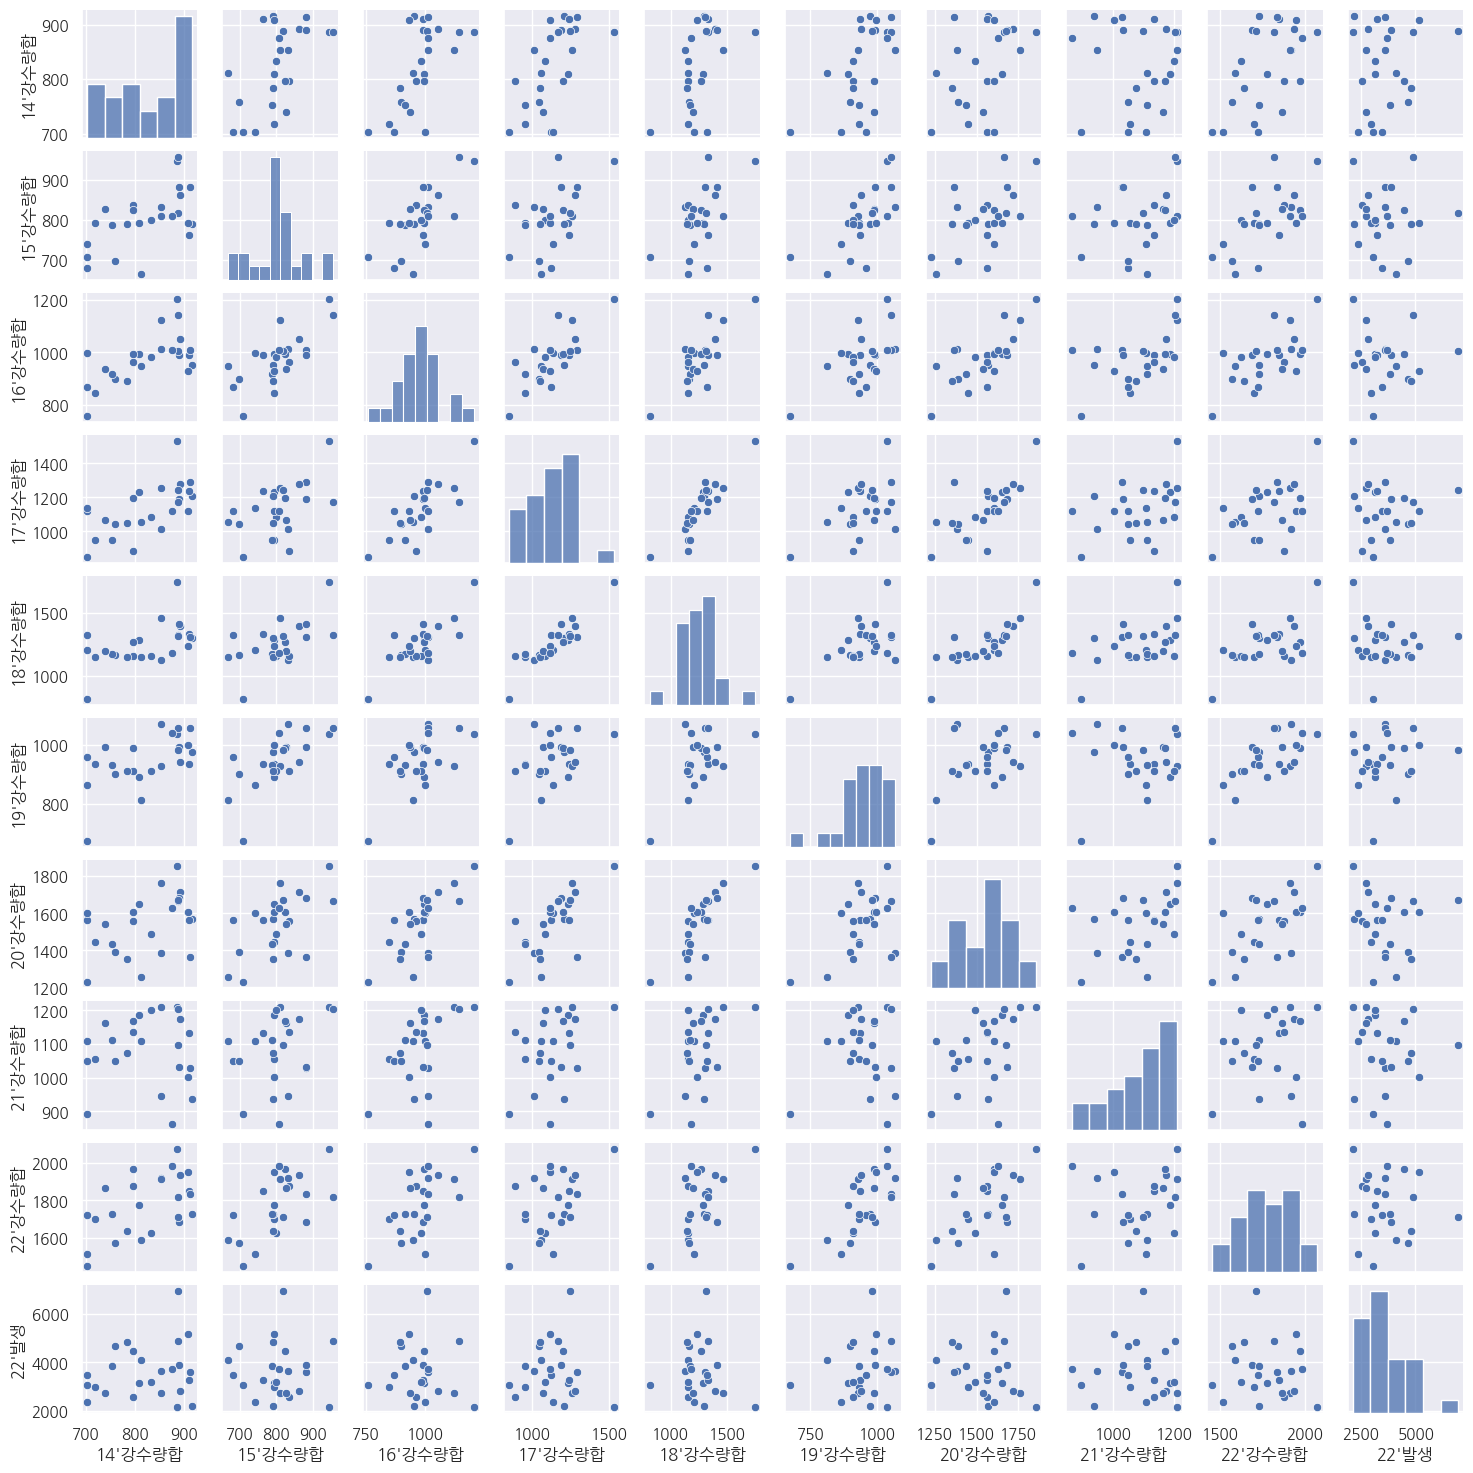

In [523]:
show_scatter(df_fix_list[7])

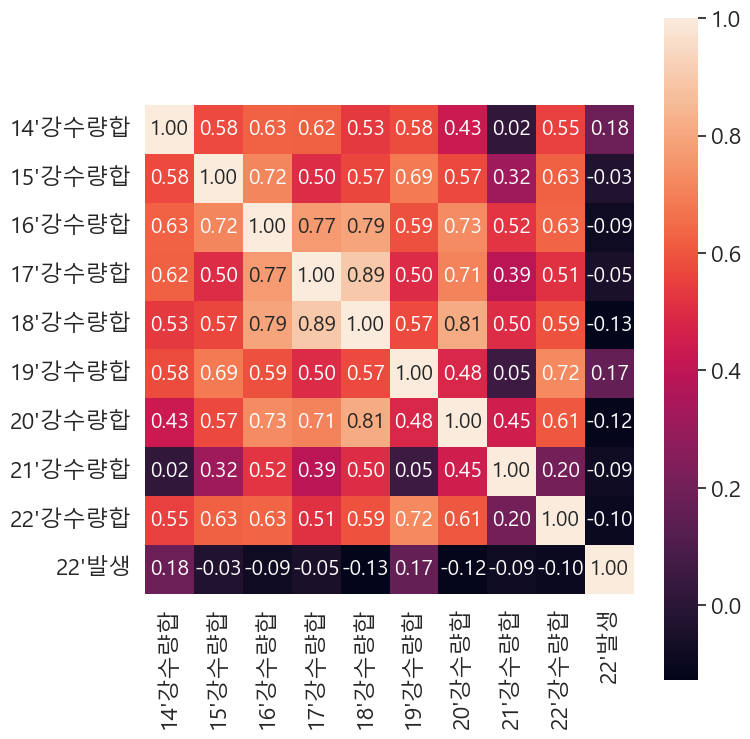

In [522]:
show_heatmap(df_corr_list[7])

In [550]:
df_corr_list[7][(abs(df_corr_list[1]) >= 0.3) | ((0.1 <= abs(df_corr_list[7])) & (abs(df_corr_list[7]) < 0.3))].loc["22'발생"]

14'강수량합    NaN
15'강수량합    NaN
16'강수량합    NaN
17'강수량합    NaN
18'강수량합    NaN
19'강수량합    NaN
20'강수량합    NaN
21'강수량합    NaN
22'강수량합    NaN
22'발생      1.0
Name: 22'발생, dtype: float64

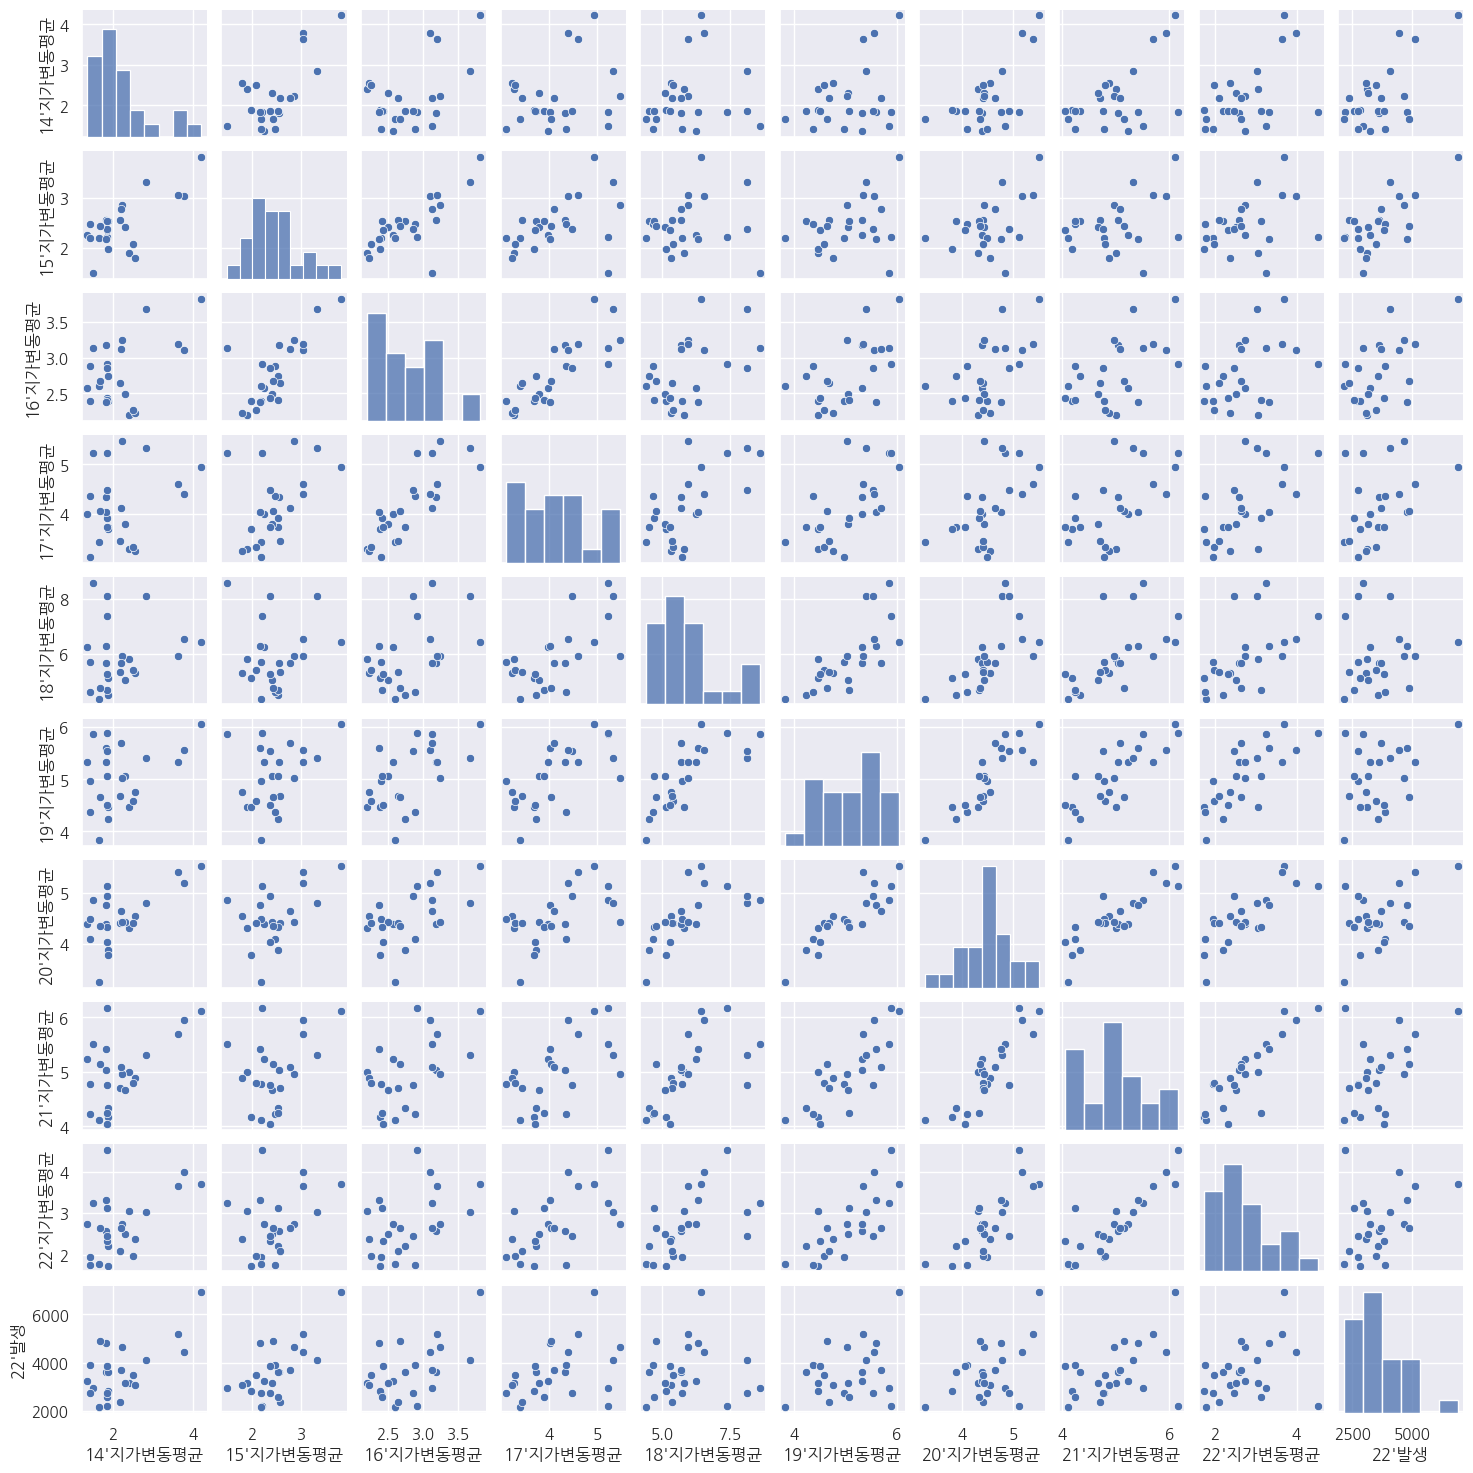

In [524]:
show_scatter(df_fix_list[8])

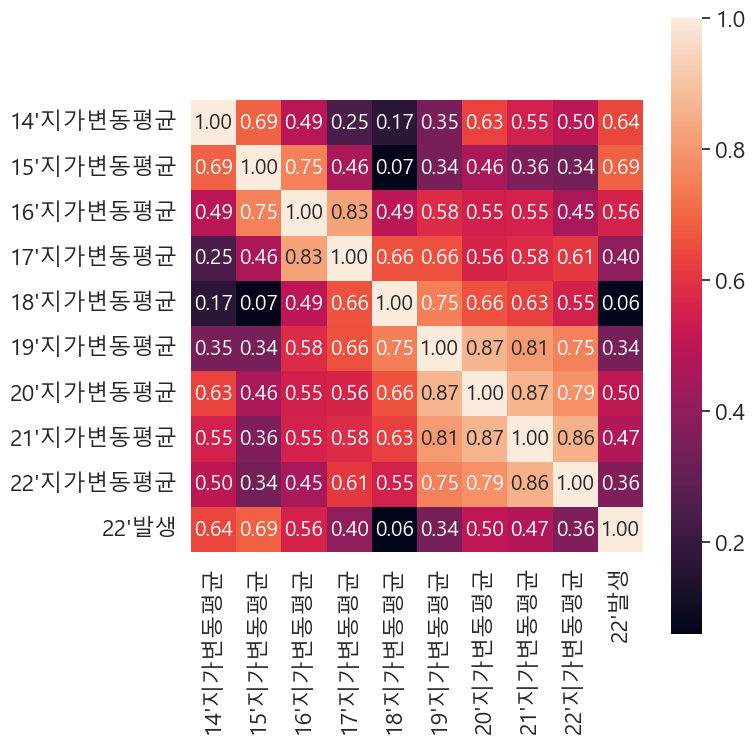

In [525]:
show_heatmap(df_corr_list[8])

In [551]:
df_corr_list[8][(abs(df_corr_list[8]) >= 0.3) | ((0.1 <= abs(df_corr_list[8])) & (abs(df_corr_list[8]) < 0.3))].loc["22'발생"]

14'지가변동평균    0.637721
15'지가변동평균    0.685064
16'지가변동평균    0.557715
17'지가변동평균    0.398785
18'지가변동평균         NaN
19'지가변동평균    0.344650
20'지가변동평균    0.501051
21'지가변동평균    0.473887
22'지가변동평균    0.360764
22'발생        1.000000
Name: 22'발생, dtype: float64